In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize, word_tokenize

import string, warnings, urllib3, locale

warnings.filterwarnings('ignore')
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [2]:
Punct_List = dict((ord(punct), None) for punct in string.punctuation + '¿¡')

def TxNormalize(text):
    
    return word_tokenize(text.lower().translate(Punct_List))

def respuesta(texto):
    Tokens_List.append(texto)
    TfidfVec = TfidfVectorizer(tokenizer = TxNormalize) 
    tfidf = TfidfVec.fit_transform(Tokens_List)
    Tokens_List.remove(texto)
    vals = cosine_similarity(tfidf[-1], tfidf)
    flat = vals.flatten()
    flat.sort()
    
    return Tokens_List[vals.argsort()[0][-2]]

def nice_axes(ax):
    plt.legend(loc = 'upper center'
               , bbox_to_anchor = (0.5, 1.1)
               , ncol = len(df.columns)
               , fancybox = False
               , shadow = True
               , fontsize = 20)

    [spine.set_visible(False) for spine in ax.spines.values()]

    ax.set_yticklabels([int(x) if x > 0 else '' for x in ax.get_yticks()])

    ax.tick_params(left = False, bottom = False)
    ax.grid(axis='y', alpha=0.25)
    ax.yaxis.set_tick_params(labelsize=18)
    ax.xaxis.set_tick_params(labelsize=18)
    ax.set_xlabel('')

 #   ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))

In [3]:
url = 'https://es.wikipedia.org/wiki/ISO_3166-2:ES'
comunidades = {}

urllib3.disable_warnings()
http = urllib3.PoolManager()
response = http.request('GET', url)
soup = BeautifulSoup(response.data, 'html.parser')

for i in soup.find_all('tr'):
    if len(i.find_all('td')) == 2:
        comunidades[i.find_all('td')[0].text[3:-1]] = i.find_all('td')[1].find_all('a', title = True )[0]['title']

comunidades 

{'AN': 'Andalucía',
 'AR': 'Aragón',
 'AS': 'Asturias',
 'CN': 'Canarias',
 'CB': 'Cantabria',
 'CM': 'Castilla-La Mancha',
 'CL': 'Castilla y León',
 'CT': 'Cataluña',
 'EX': 'Extremadura',
 'GA': 'Galicia',
 'IB': 'Islas Baleares',
 'RI': 'La Rioja (España)',
 'MD': 'Comunidad de Madrid',
 'MC': 'Región de Murcia',
 'NC': 'Comunidad Foral de Navarra',
 'PV': 'País Vasco',
 'VC': 'Comunidad Valenciana',
 'CE': 'Ceuta',
 'ML': 'Melilla'}

In [4]:
provincias = {}
InfoComunidad = {}

for i in soup.find_all('tr'):
    if len(i.find_all('td')) == 3:
        provincias[i.find_all('td')[0].find_all('tt')[0].text[3:]] = i.find_all('td')[1].find_all('a')[0].text
        InfoComunidad[i.find_all('td')[1].find_all('a')[0].text] = i.find_all('td')[2].find_all('a', title = True)[0]['title']

provincias

{'C': 'La Coruña',
 'VI': 'Álava',
 'AB': 'Albacete',
 'A': 'Alicante',
 'AL': 'Almería',
 'O': 'Asturias',
 'AV': 'Ávila',
 'BA': 'Badajoz',
 'PM': 'Baleares',
 'B': 'Barcelona',
 'BI': '[nota 4]',
 'BU': 'Burgos',
 'CC': 'Cáceres',
 'CA': 'Cádiz',
 'S': 'Cantabria',
 'CS': 'Castellón',
 'CR': 'Ciudad Real',
 'CO': 'Córdoba',
 'CU': 'Cuenca',
 'SS': '[nota 4]',
 'GI': 'Gerona',
 'GR': 'Granada',
 'GU': 'Guadalajara',
 'H': 'Huelva',
 'HU': 'Huesca',
 'J': 'Jaén',
 'LO': 'La Rioja',
 'GC': 'Las Palmas',
 'LE': 'León',
 'L': 'Lérida',
 'LU': 'Lugo',
 'M': 'Madrid',
 'MA': 'Málaga',
 'MU': 'Murcia',
 'NA': 'Navarra',
 'OR': 'Orense',
 'P': 'Palencia',
 'PO': 'Pontevedra',
 'SA': 'Salamanca',
 'TF': 'Santa Cruz de Tenerife',
 'SG': 'Segovia',
 'SE': 'Sevilla',
 'SO': 'Soria',
 'T': 'Tarragona',
 'TE': 'Teruel',
 'TO': 'Toledo',
 'V': 'Valencia',
 'VA': 'Valladolid',
 'ZA': 'Zamora',
 'Z': 'Zaragoza'}

## Poblacion

In [5]:
url = 'https://www.ine.es/jaxiT3/files/t/es/csv_bdsc/2853.csv?nocab=1'

poblacion = pd.read_csv(url, error_bad_lines=False, sep=';', header=0)

poblacion = poblacion[(poblacion['Comunidades y Ciudades Autónomas'] != 'Total') 
                      & (poblacion['Periodo'] == 2020)].pivot(index = 'Comunidades y Ciudades Autónomas'
                                                             , columns = 'Sexo'
                                                             , values = 'Total')

Tokens_List = sent_tokenize(" ".join(review + '.' for review in comunidades.values()), 'spanish')
matriz = {}

for i in poblacion.index.values:
    matriz[i] = respuesta(i.replace('Balears','Baleares'))[:-1]
            
poblacion.index = poblacion.index.map(matriz)

for i in ['Hombres', 'Mujeres', 'Total']:
    poblacion[i] = poblacion[i].str.replace('.','').astype(int)


poblacion

Sexo                              Hombres  Mujeres    Total
Comunidades y Ciudades Autónomas                           
Andalucía                         4170605  4293806  8464411
Aragón                             656056   673335  1329391
Asturias                           486066   532718  1018784
Islas Baleares                     584298   587245  1171543
Canarias                          1076185  1099767  2175952
Cantabria                          282559   300346   582905
Castilla y León                   1178846  1216072  2394918
Castilla-La Mancha                1023740  1021481  2045221
Cataluña                          3826964  3953515  7780479
Comunidad Valenciana              2492121  2565232  5057353
Extremadura                        526288   537699  1063987
Galicia                           1300153  1401666  2701819
Comunidad de Madrid               3243793  3536095  6779888
Región de Murcia                   756699   754552  1511251
Comunidad Foral de Navarra         327226   333971   661197
País Vasco                        1079452  1141052  2220504
La Rioja (España)                  157835   162079   319914
Ceuta                               42542    41660    84202
Melilla                             44162    42914    87076

In [6]:
url = 'https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv'

df = pd.read_csv(url)

df = (df
      .assign(Provincia = df.provincia_iso.map(provincias))
      .assign(Comunidad = df.provincia_iso.map(provincias).map(InfoComunidad))
      .set_index(pd.to_datetime(df.fecha), drop = True)
     )

df.tail()

provincia_iso sexo grupo_edad       fecha  num_casos  num_hosp  \
fecha                                                                       
2021-03-11            ZA   NC      50-59  2021-03-11          0         0   
2021-03-11            ZA   NC      60-69  2021-03-11          0         0   
2021-03-11            ZA   NC      70-79  2021-03-11          0         0   
2021-03-11            ZA   NC        80+  2021-03-11          0         0   
2021-03-11            ZA   NC         NC  2021-03-11          0         0   

            num_uci  num_def Provincia        Comunidad  
fecha                                                    
2021-03-11        0        0    Zamora  Castilla y León  
2021-03-11        0        0    Zamora  Castilla y León  
2021-03-11        0        0    Zamora  Castilla y León  
2021-03-11        0        0    Zamora  Castilla y León  
2021-03-11        0        0    Zamora  Castilla y León

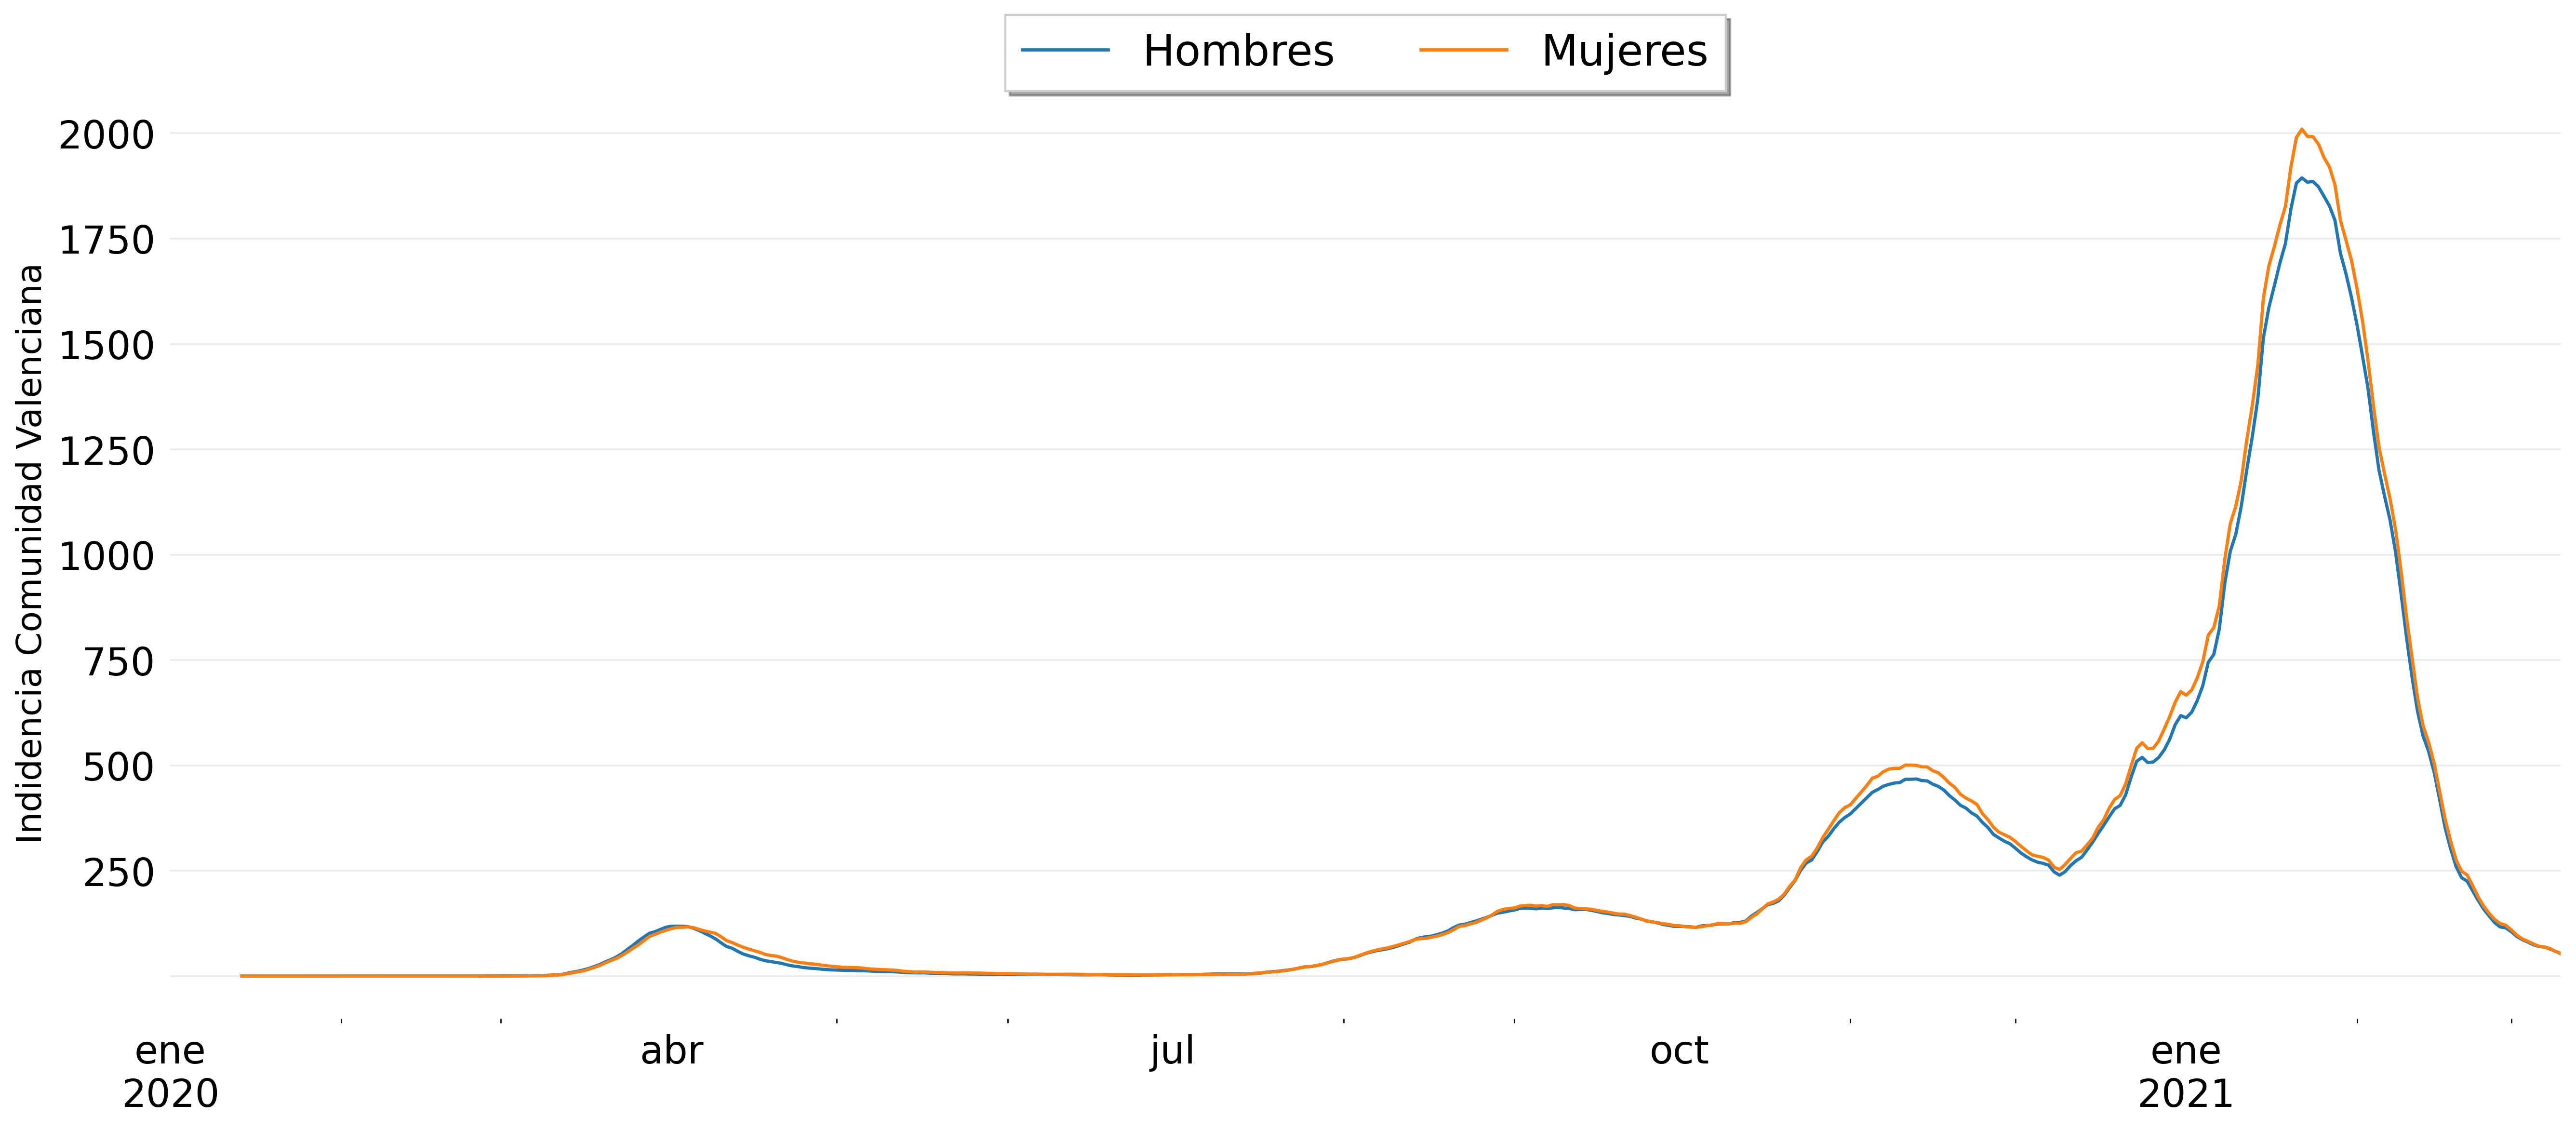

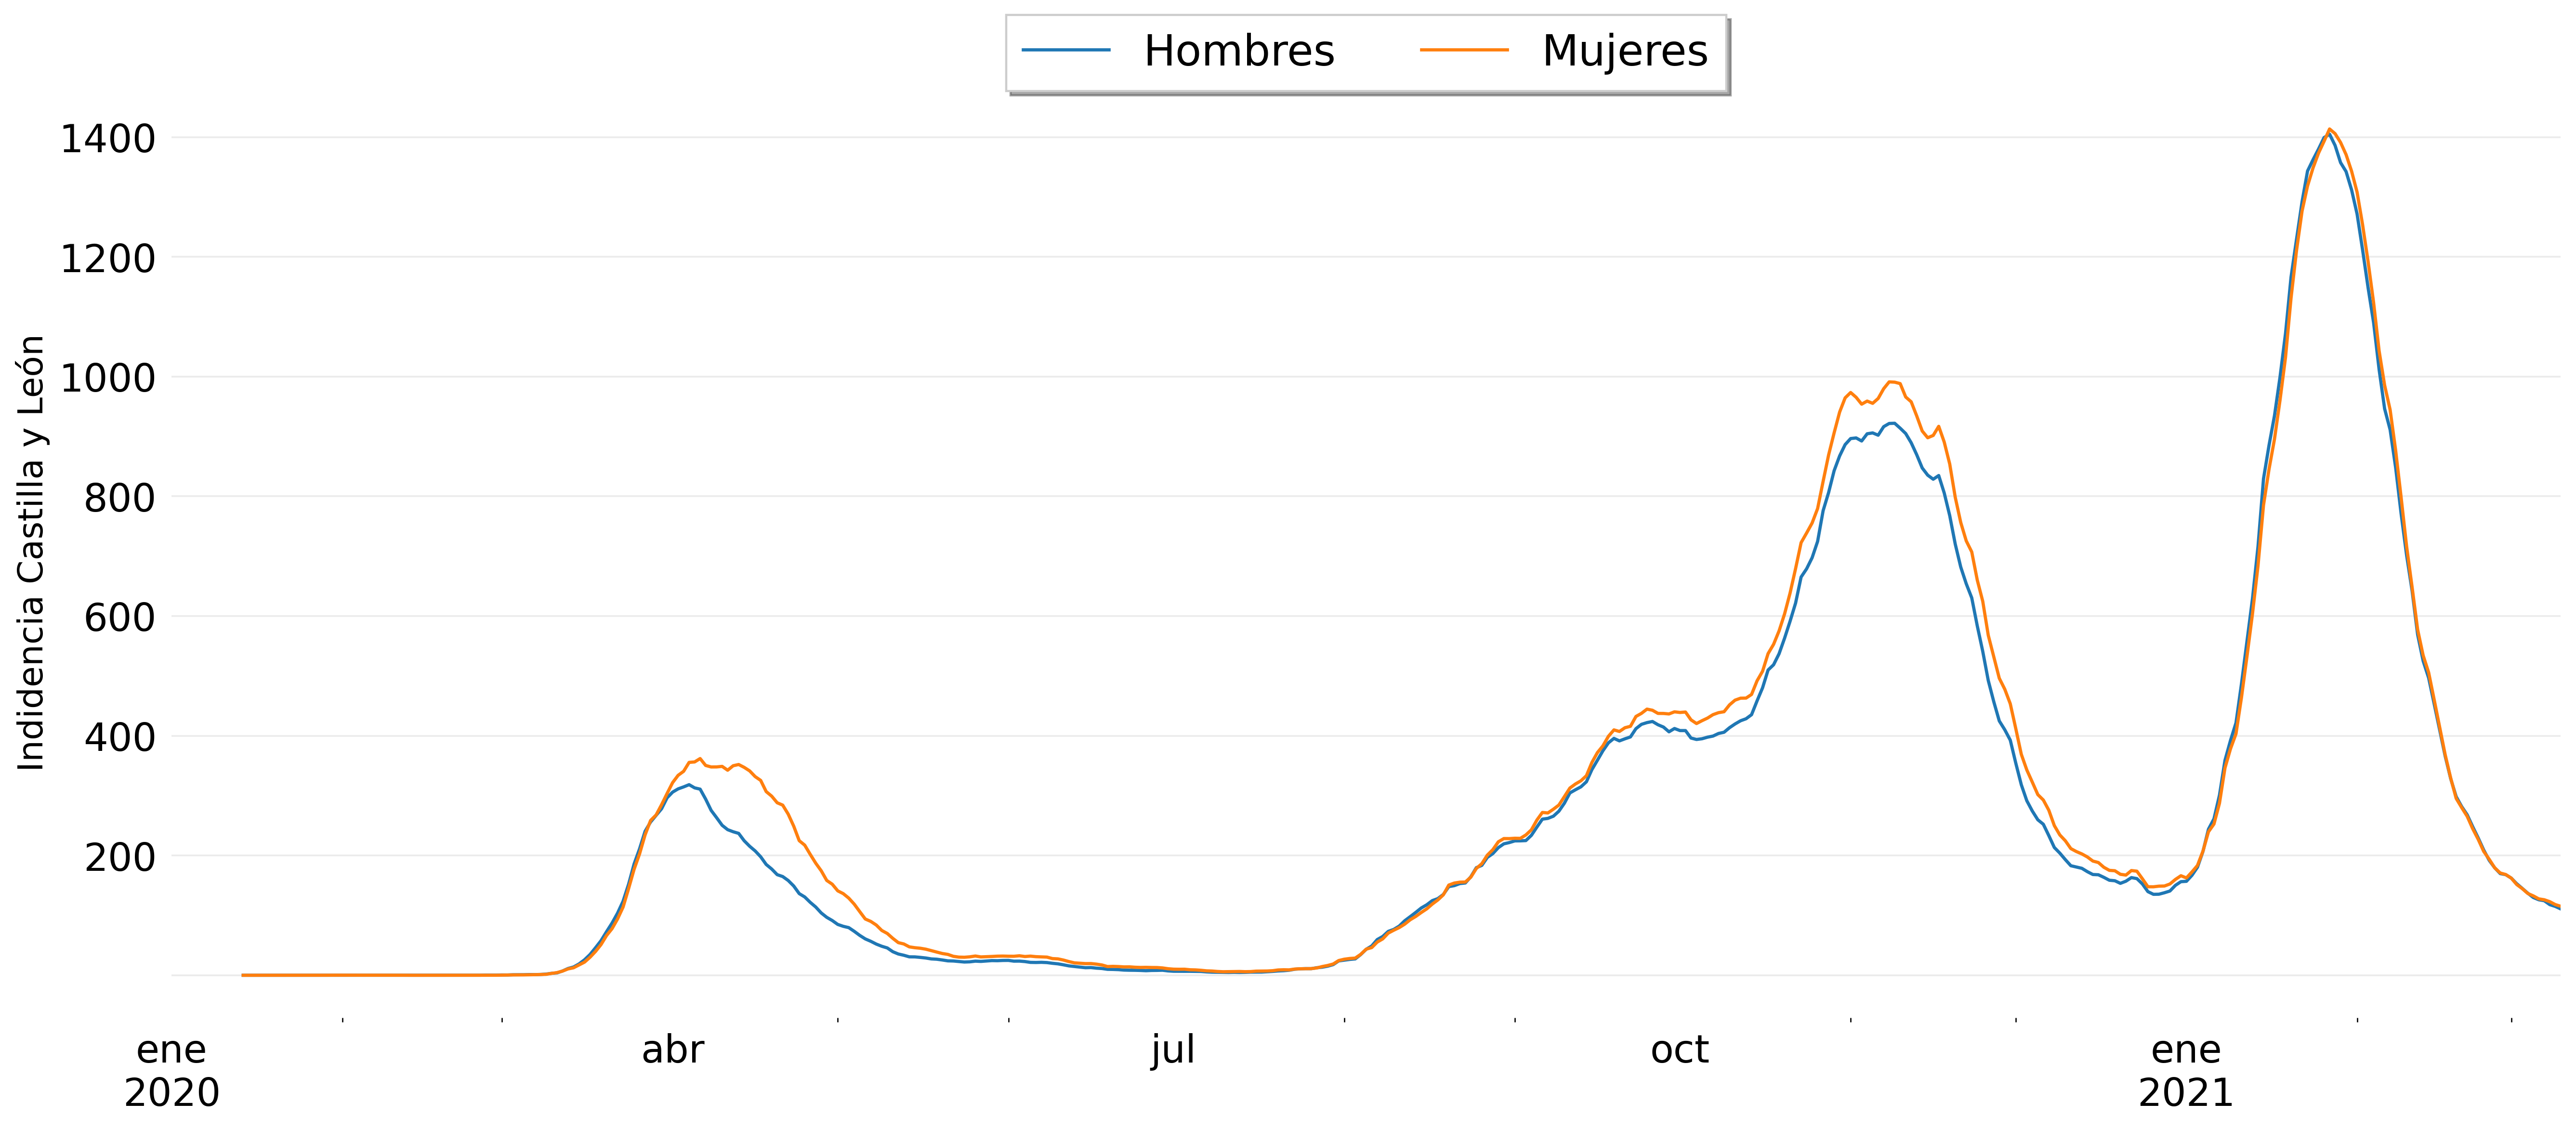

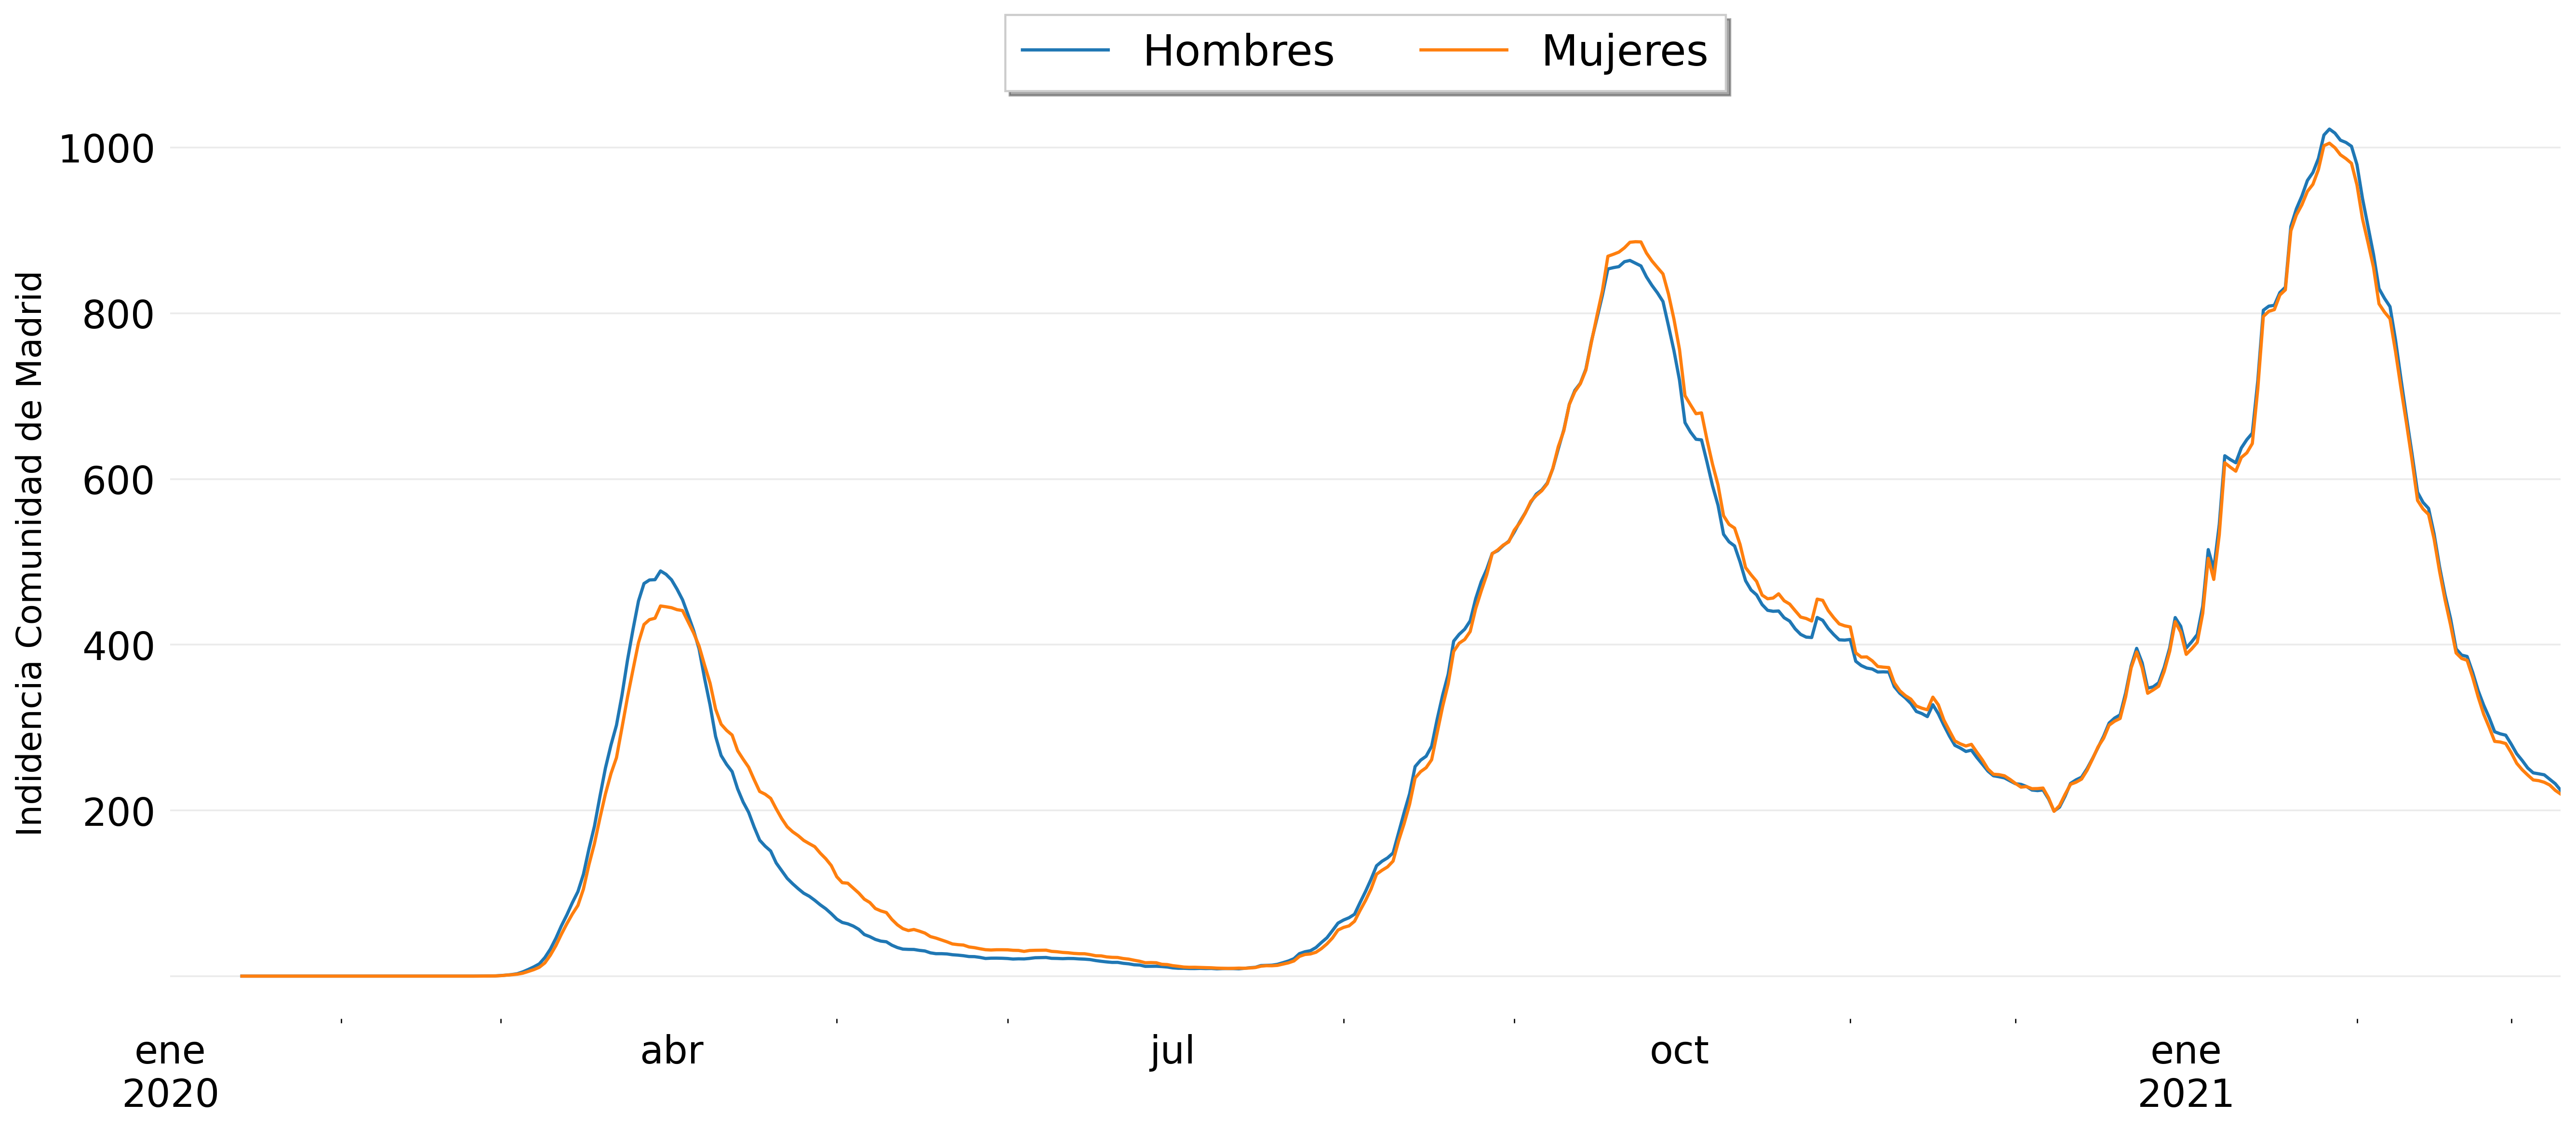

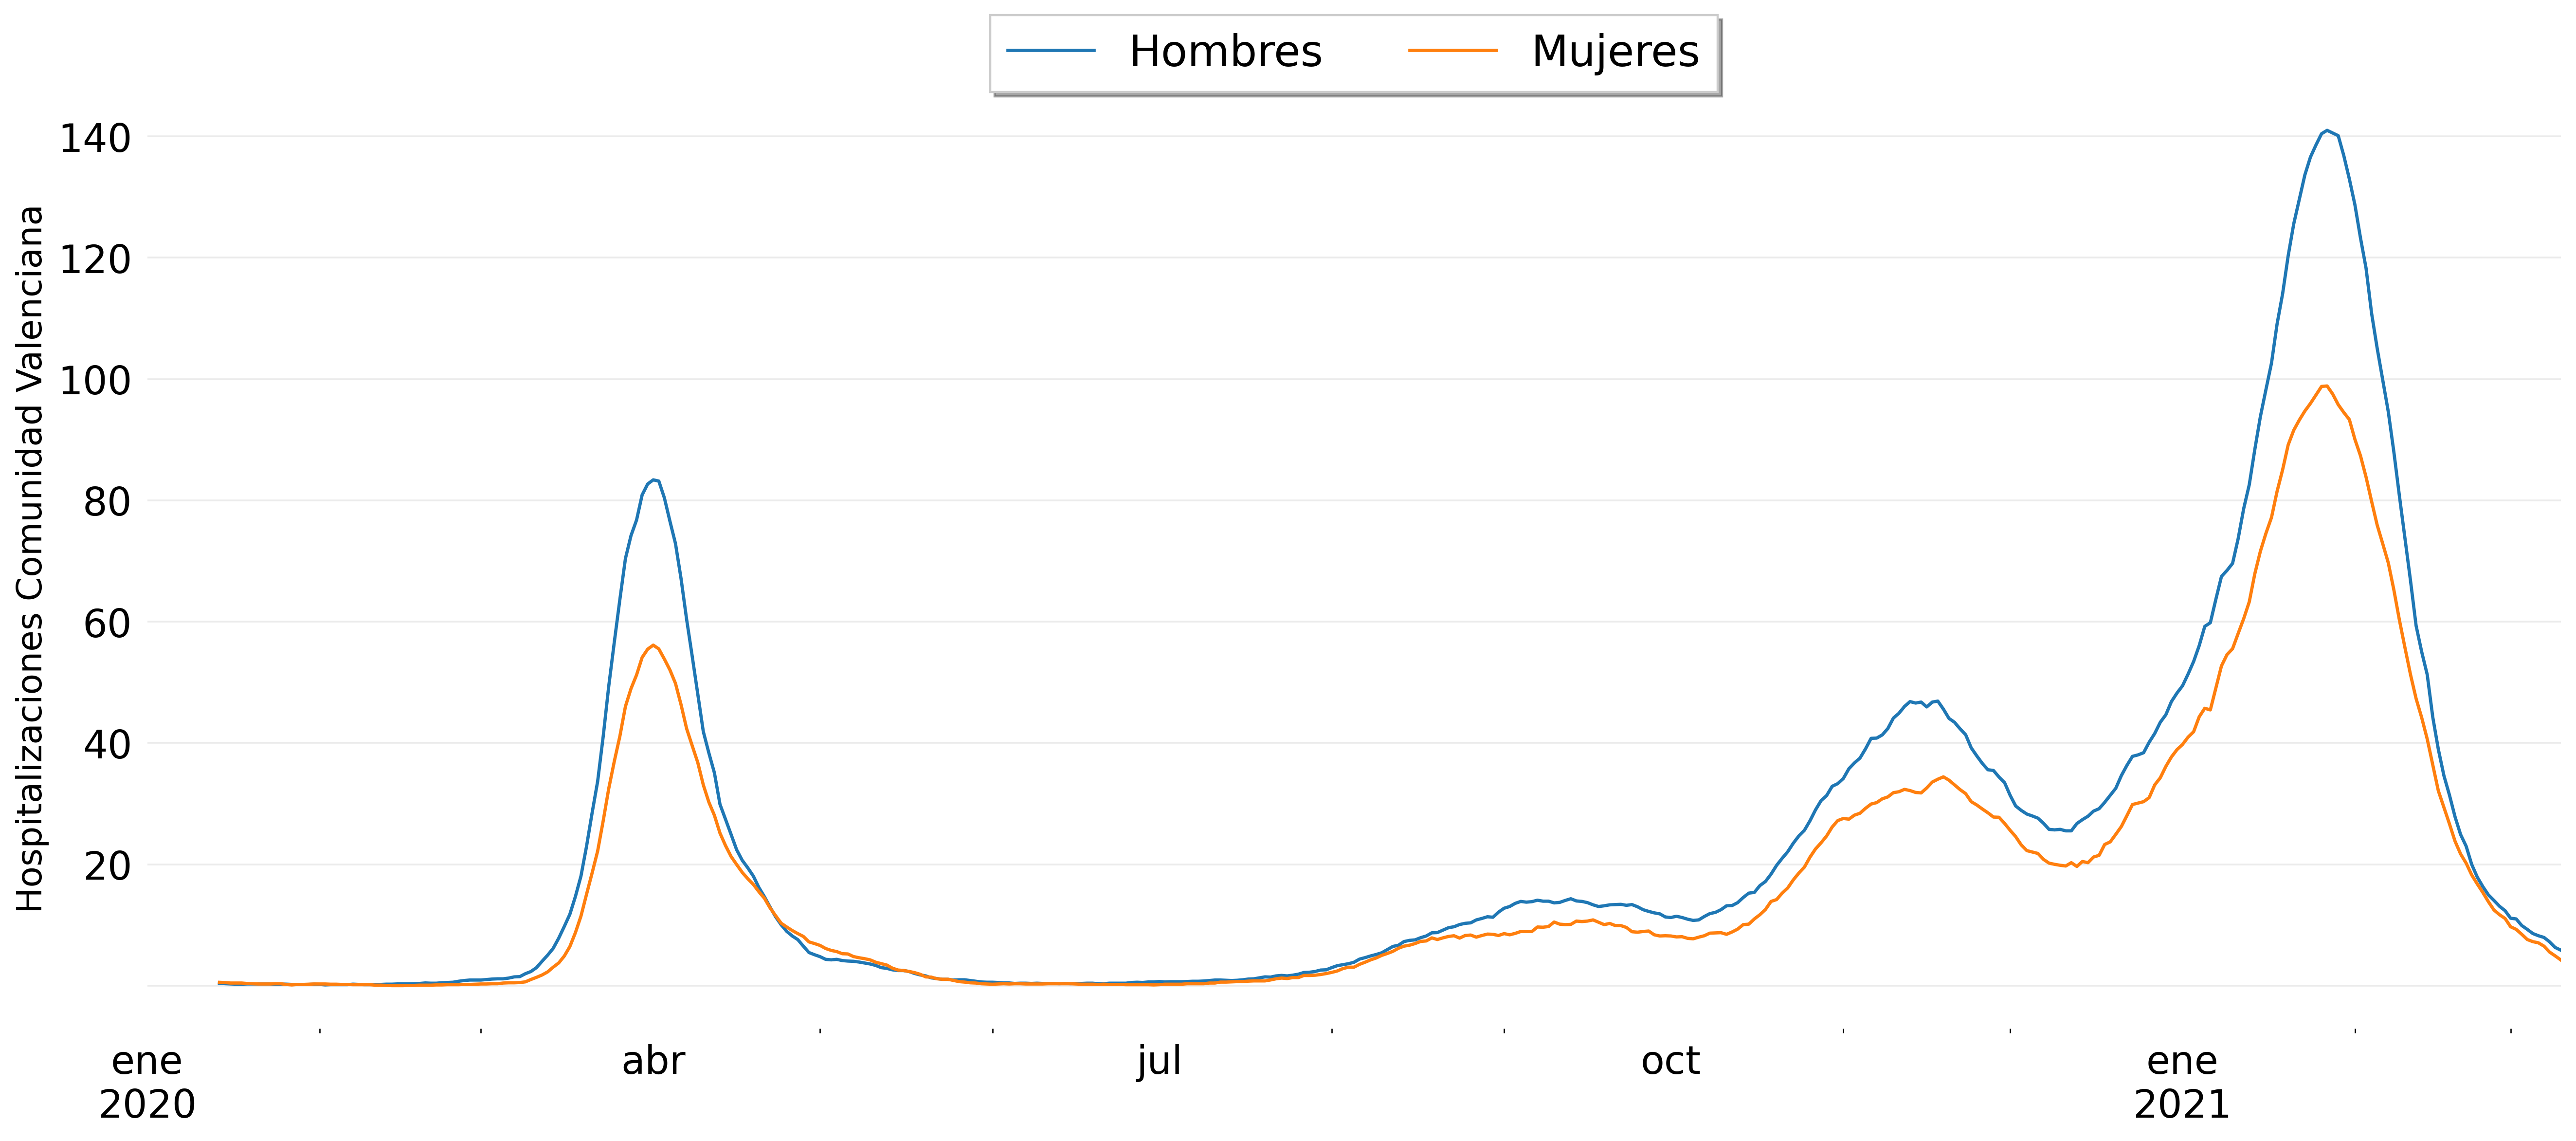

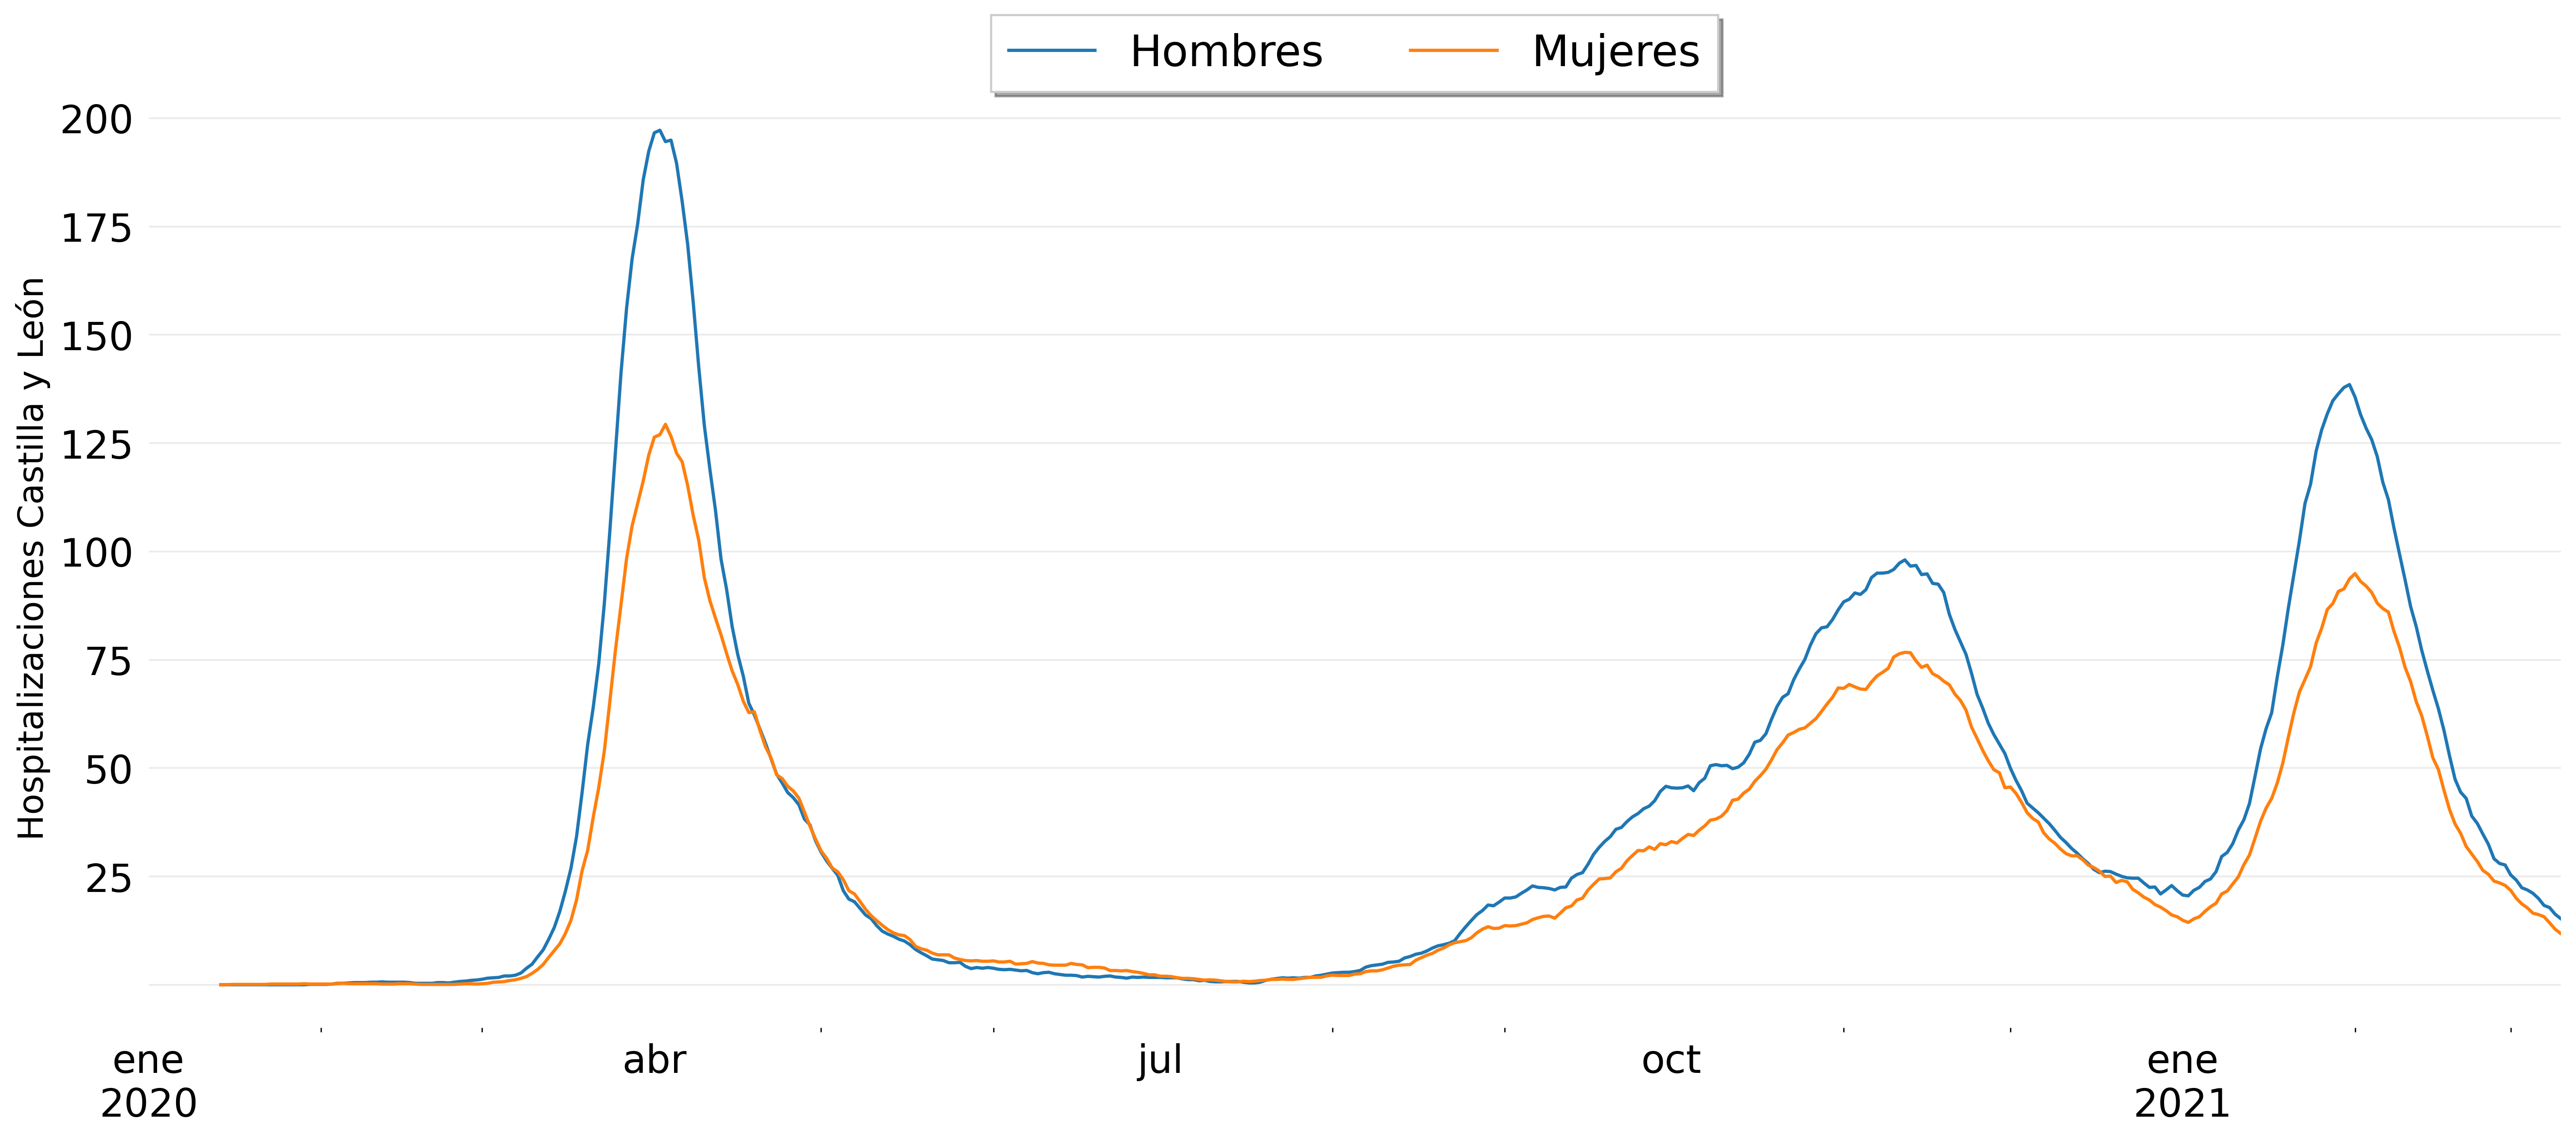

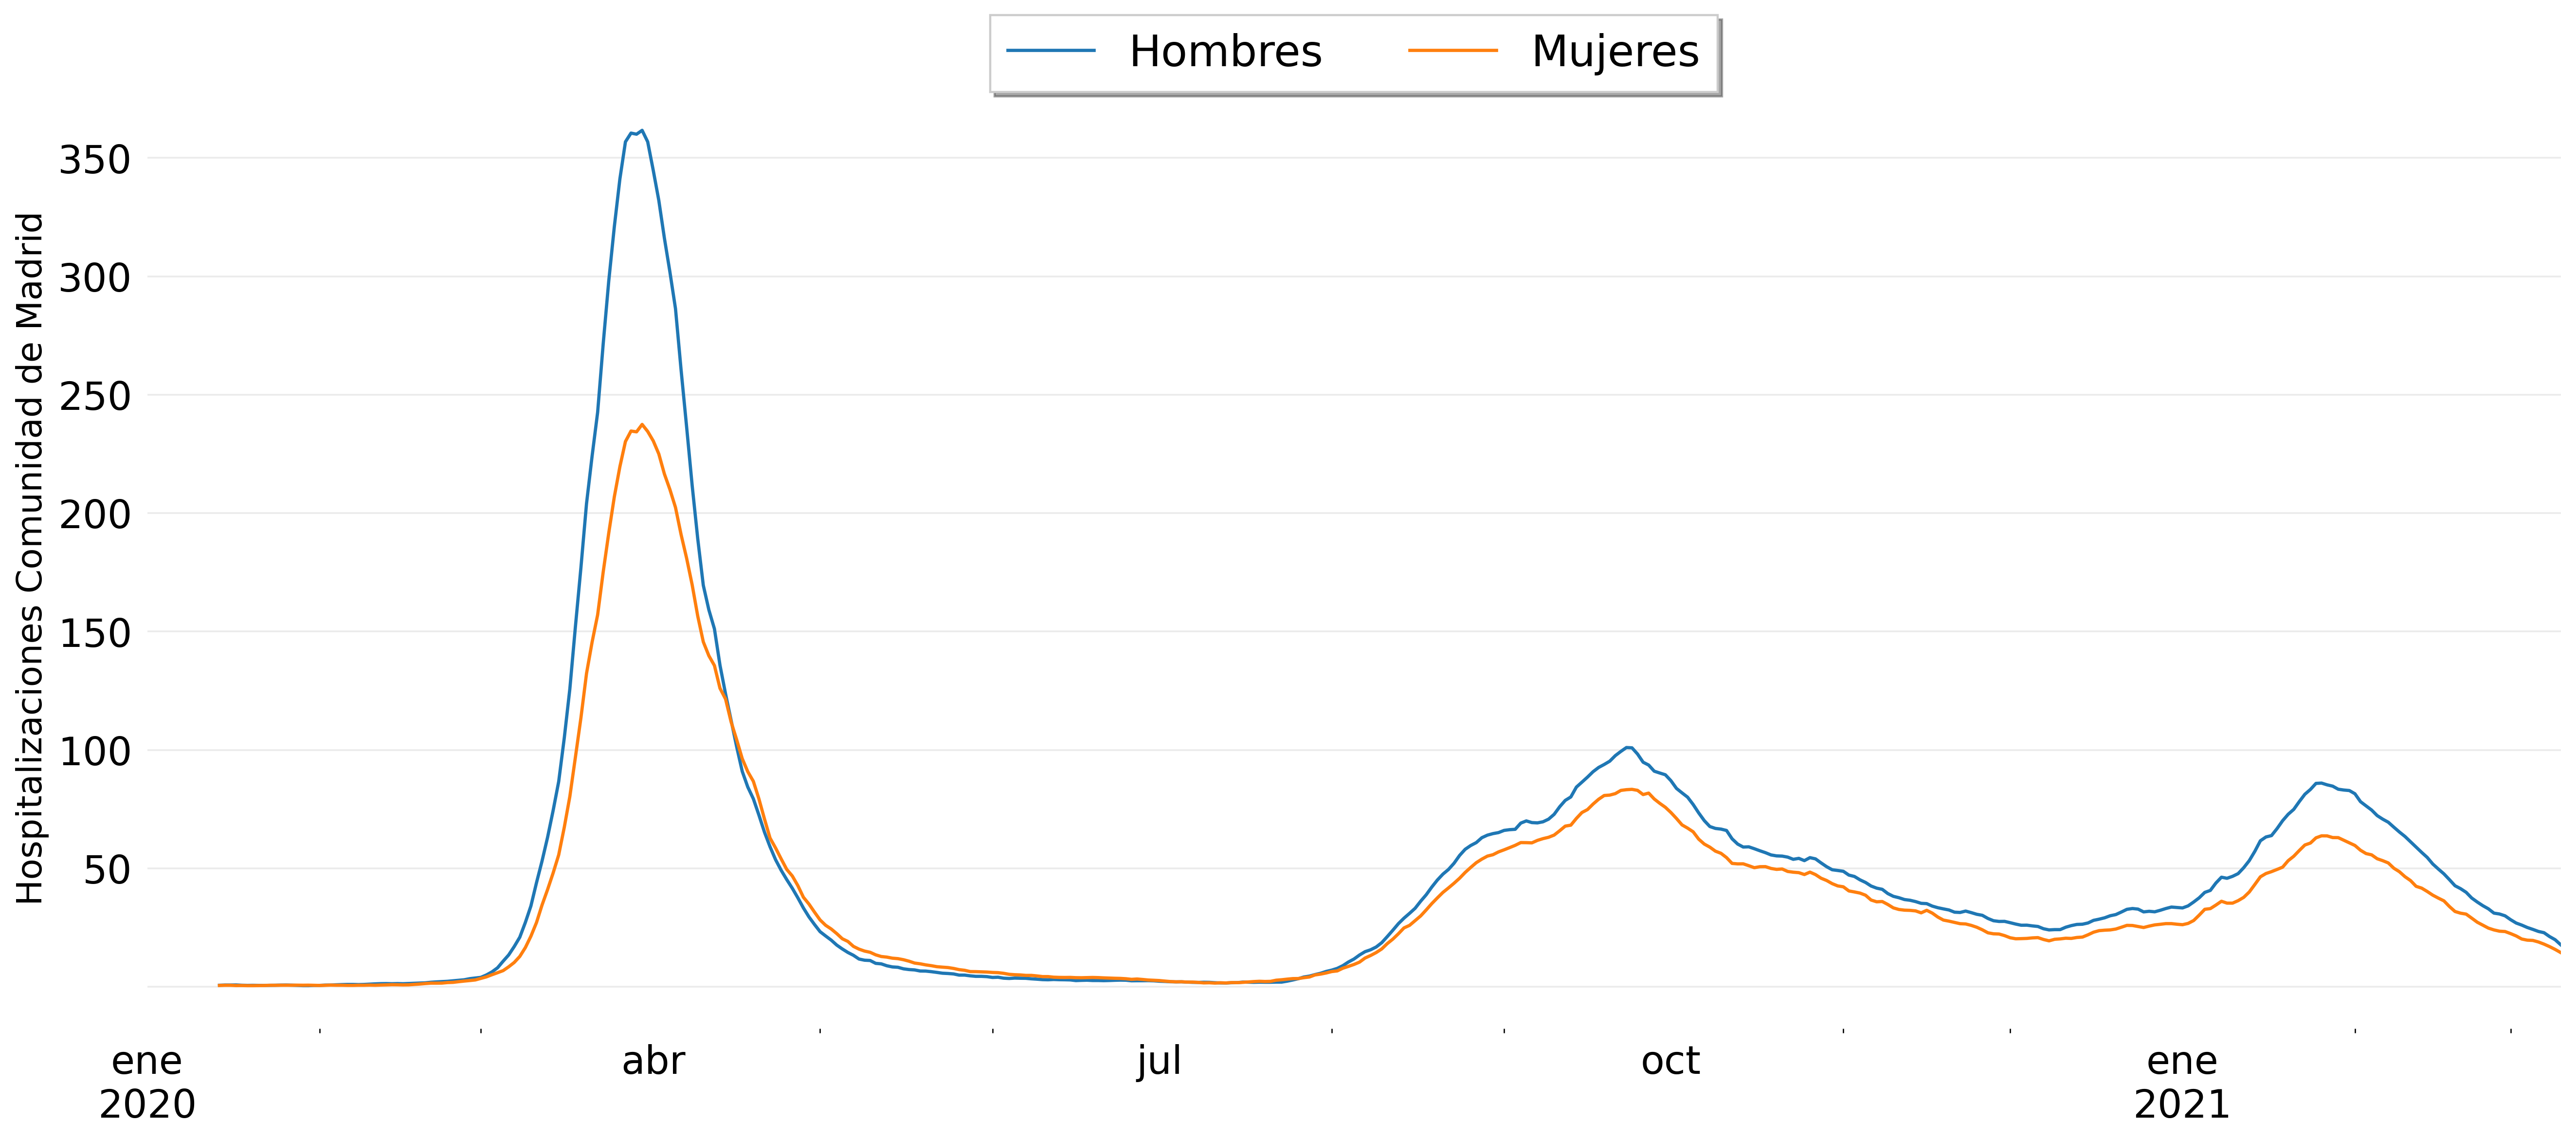

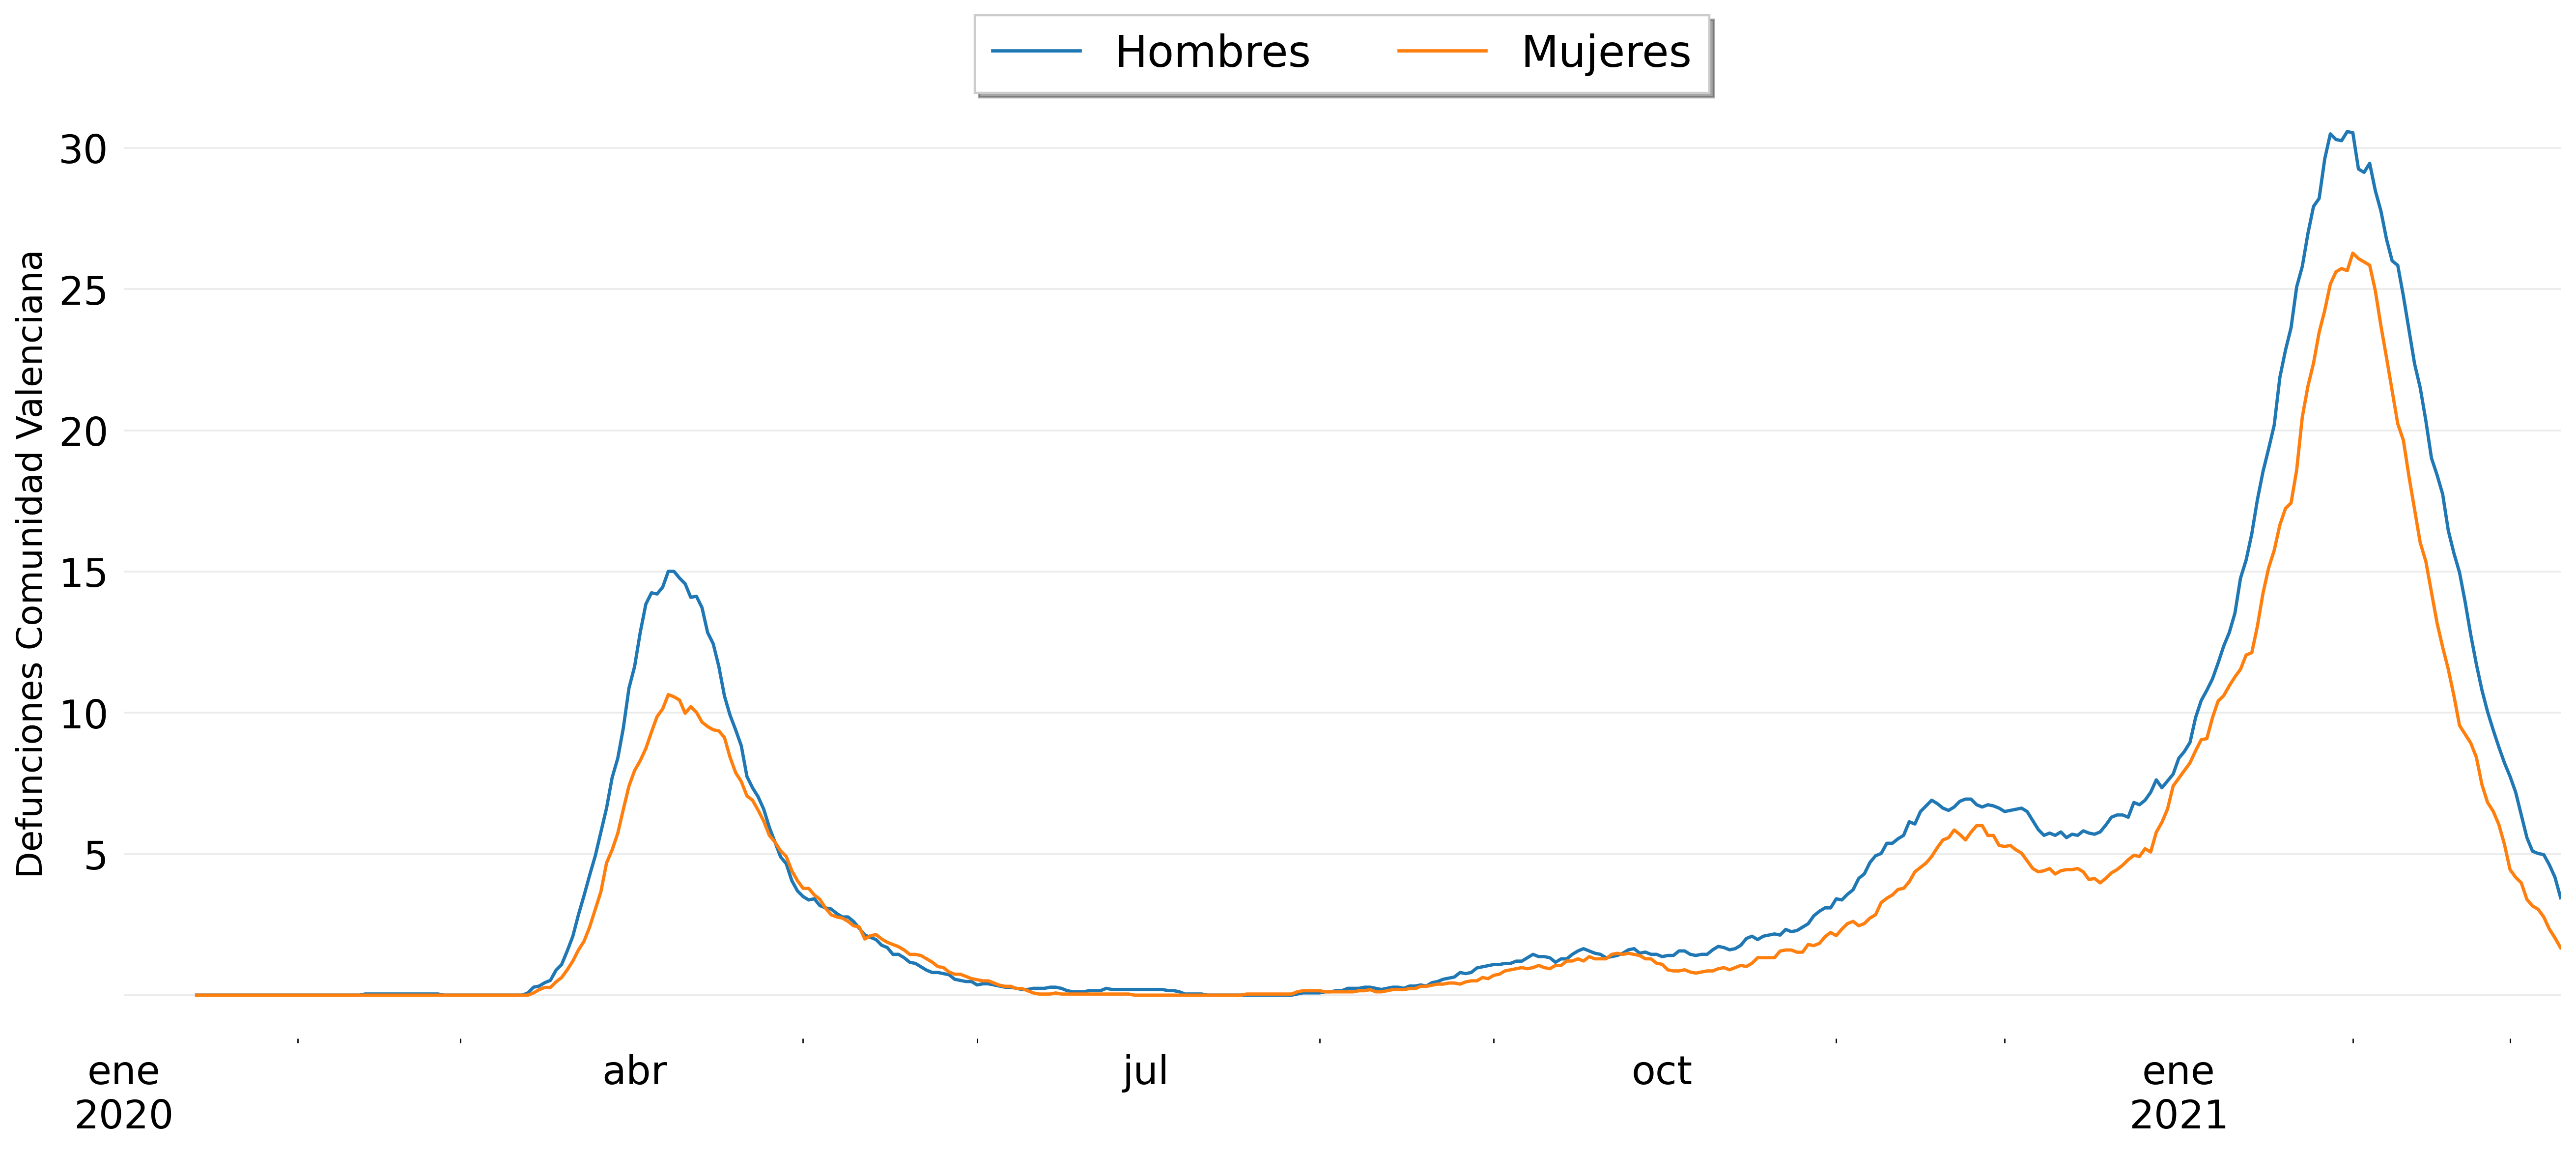

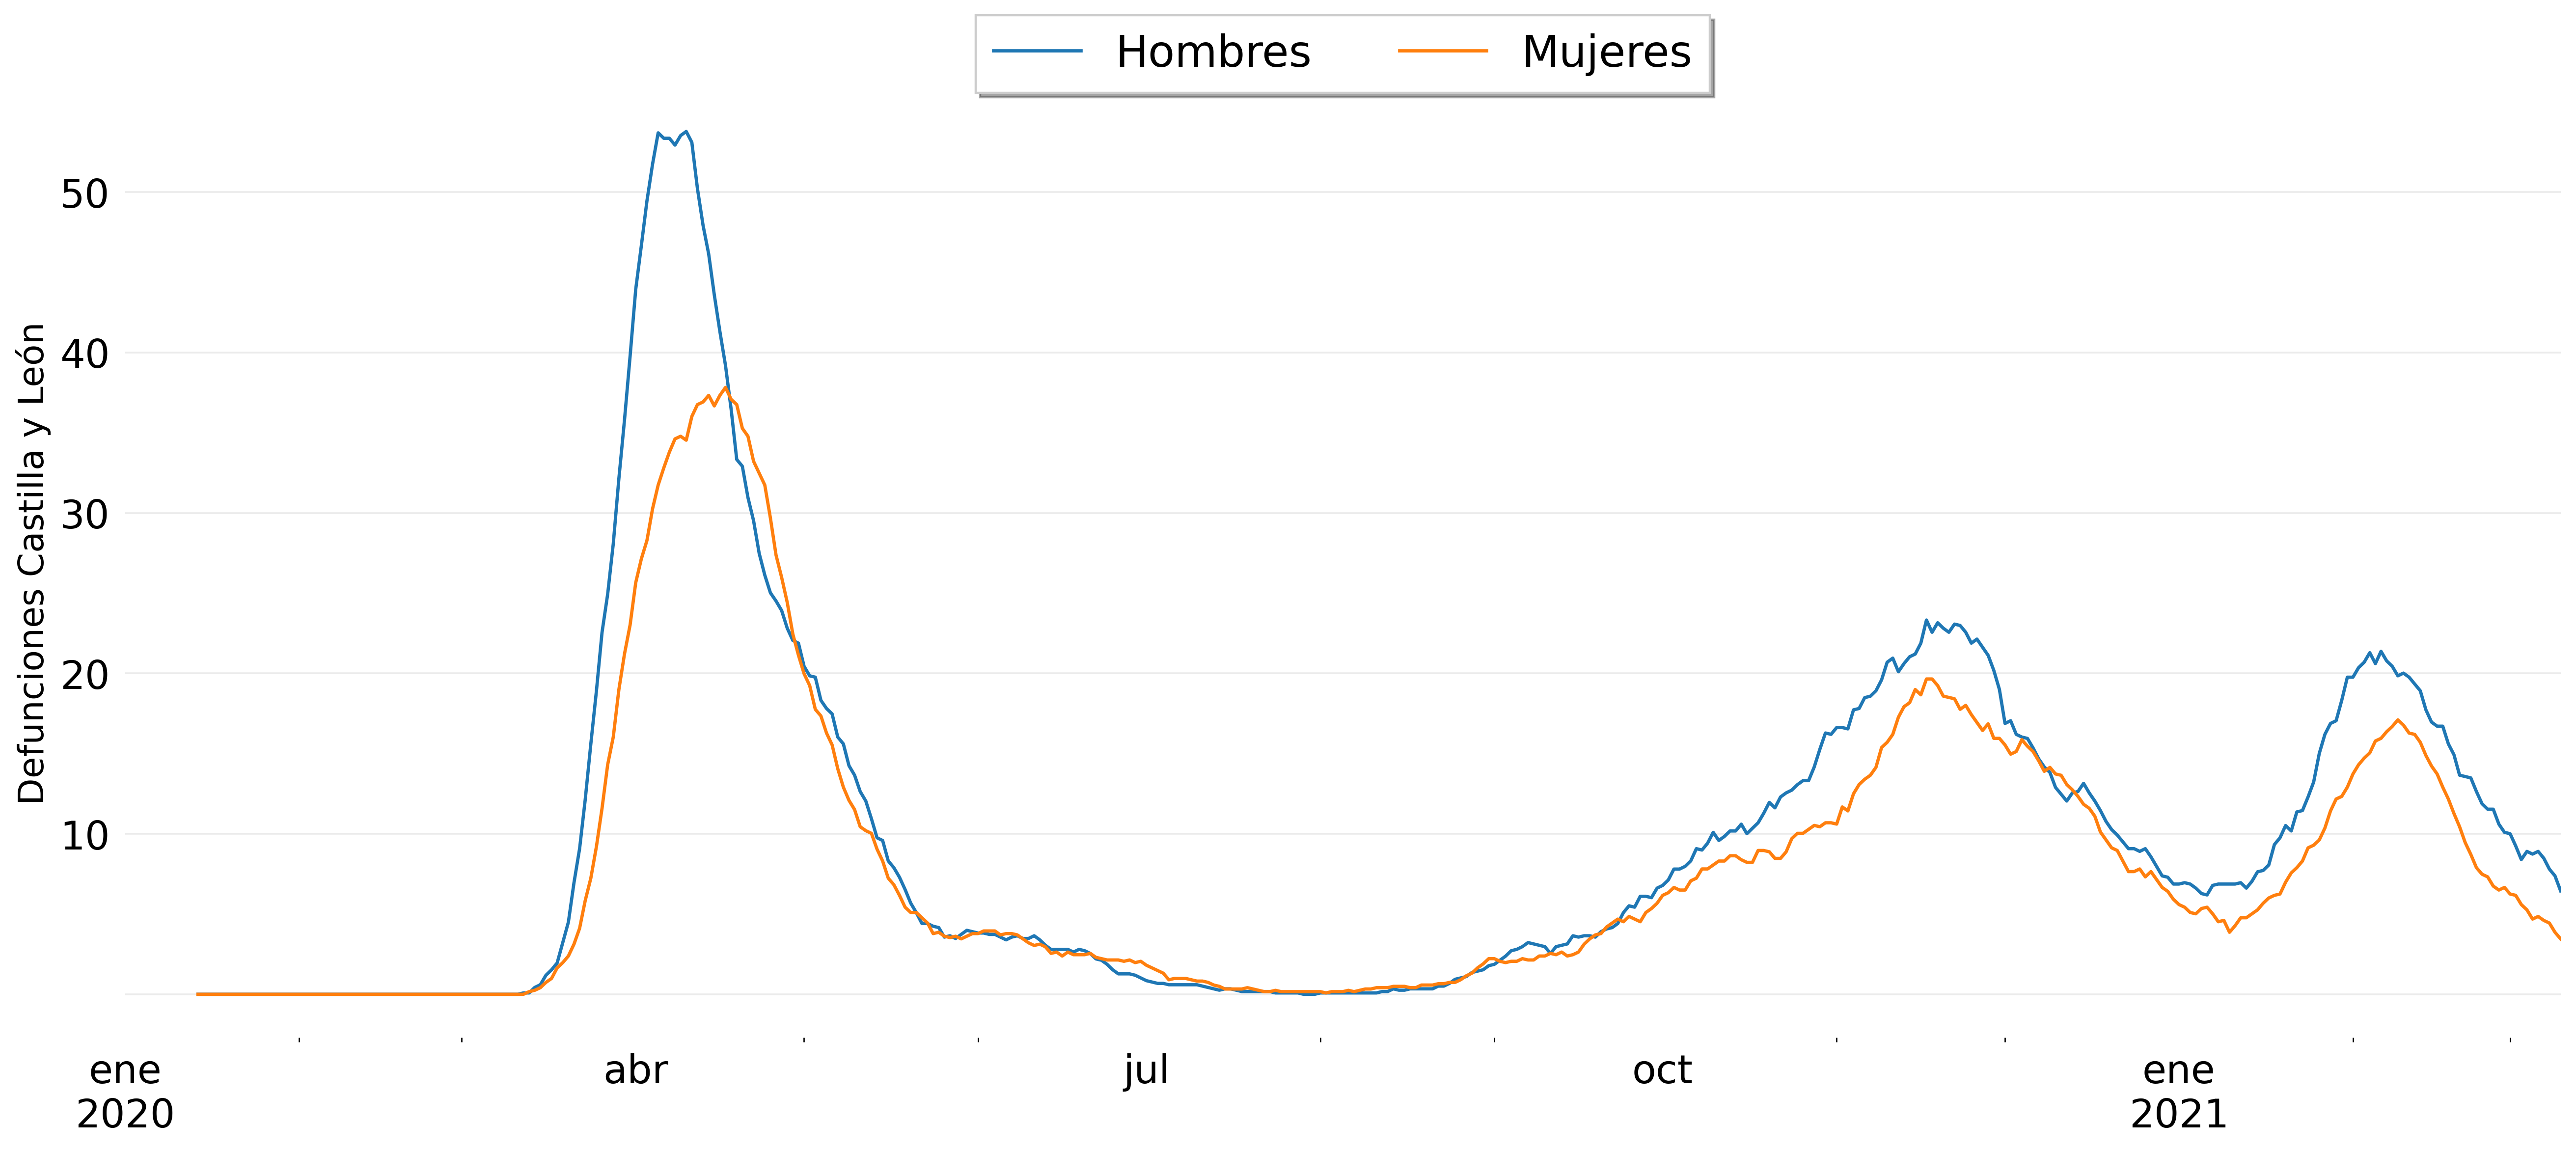

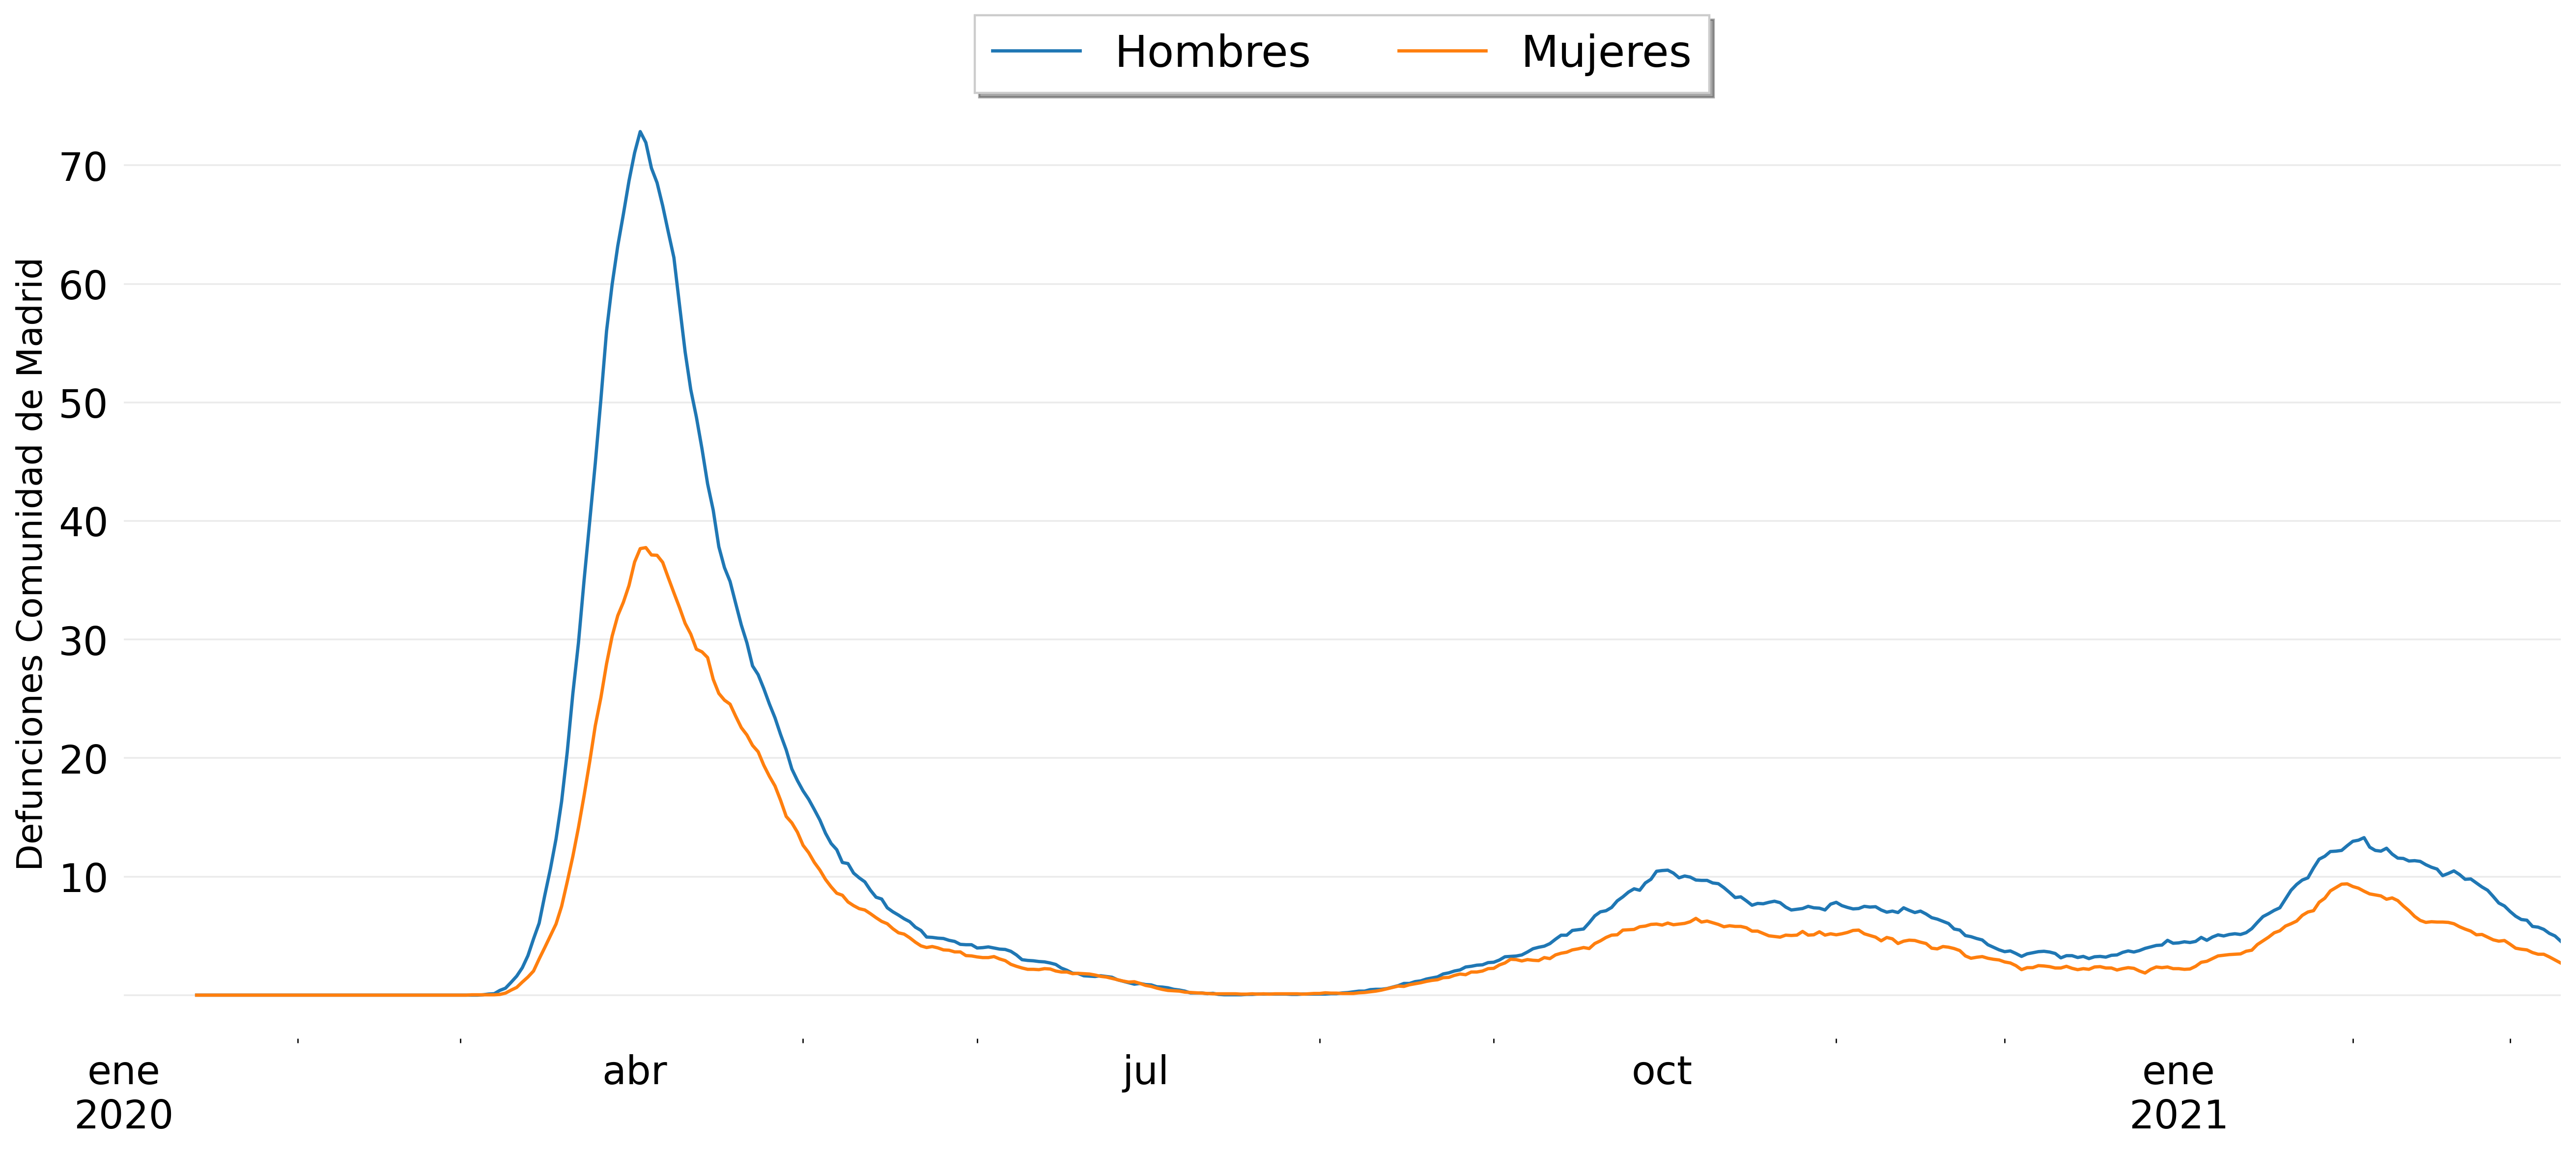

In [7]:

def make_df(df, sexo,kpi):
    
    return (df[df.sexo == ('H' if sexo == 'Hombres' else 'M')]
            .groupby('Comunidad')
            .resample('d')
            .agg({'num_casos':'sum'
                  , 'num_hosp':'sum'
                  , 'num_def':'sum'})
            .reset_index()
            .set_index('Comunidad')
            .merge(poblacion, left_index=True, right_index=True)
            .assign(Indidencia = lambda x: x.num_casos / x[sexo] * 1e5)
            .assign(Hospitalizaciones = lambda x: x.num_hosp / x[sexo] * 1e5)
            .assign(Defunciones = lambda x: x.num_def / x[sexo] * 1e5)
            .reset_index()
            .rename(columns={'index':'Comunidad'})
            .pivot(index = ['fecha'],columns = 'Comunidad', values= [kpi])
            .set_axis(df.Comunidad.sort_values().dropna().unique(), axis=1)
            .rolling(14)
            .sum()
           )[:-1]

for k in ['Indidencia', 'Hospitalizaciones','Defunciones']:
    for i in ['Comunidad Valenciana','Castilla y León','Comunidad de Madrid']:
        fig, ax = plt.subplots(figsize=(20,8)
                               , dpi = 320)


        make_df(df, 'Hombres',k)[i].plot(ax=ax, label ='Hombres')
        make_df(df, 'Mujeres',k)[i].plot(ax=ax, label = 'Mujeres')

        ax.set_ylabel(k + ' ' + i, fontsize = 16)
        nice_axes(ax)
        plt.show()


In [8]:
url = 'https://cnecovid.isciii.es/covid19/resources/casos_tecnica_ccaa.csv'
df = pd.read_csv(url)

df = (df
      .assign(ccaa_iso = df.ccaa_iso.map(comunidades))
      .set_index('ccaa_iso')
      .merge(poblacion.Total, left_index=True, right_index=True)
      .reset_index()
      .set_index('fecha')
      .rename(columns = {'index': 'Comunidad'
                         , 'num_casos': 'Casos'}))

df[df.Comunidad == 'Comunidad Valenciana'].tail(15)['Casos']

fecha
2021-02-25    292
2021-02-26    284
2021-02-27    165
2021-02-28    136
2021-03-01    208
2021-03-02    195
2021-03-03    213
2021-03-04    184
2021-03-05    142
2021-03-06    112
2021-03-07     65
2021-03-08     66
2021-03-09     62
2021-03-10     58
2021-03-11      0
Name: Casos, dtype: int64

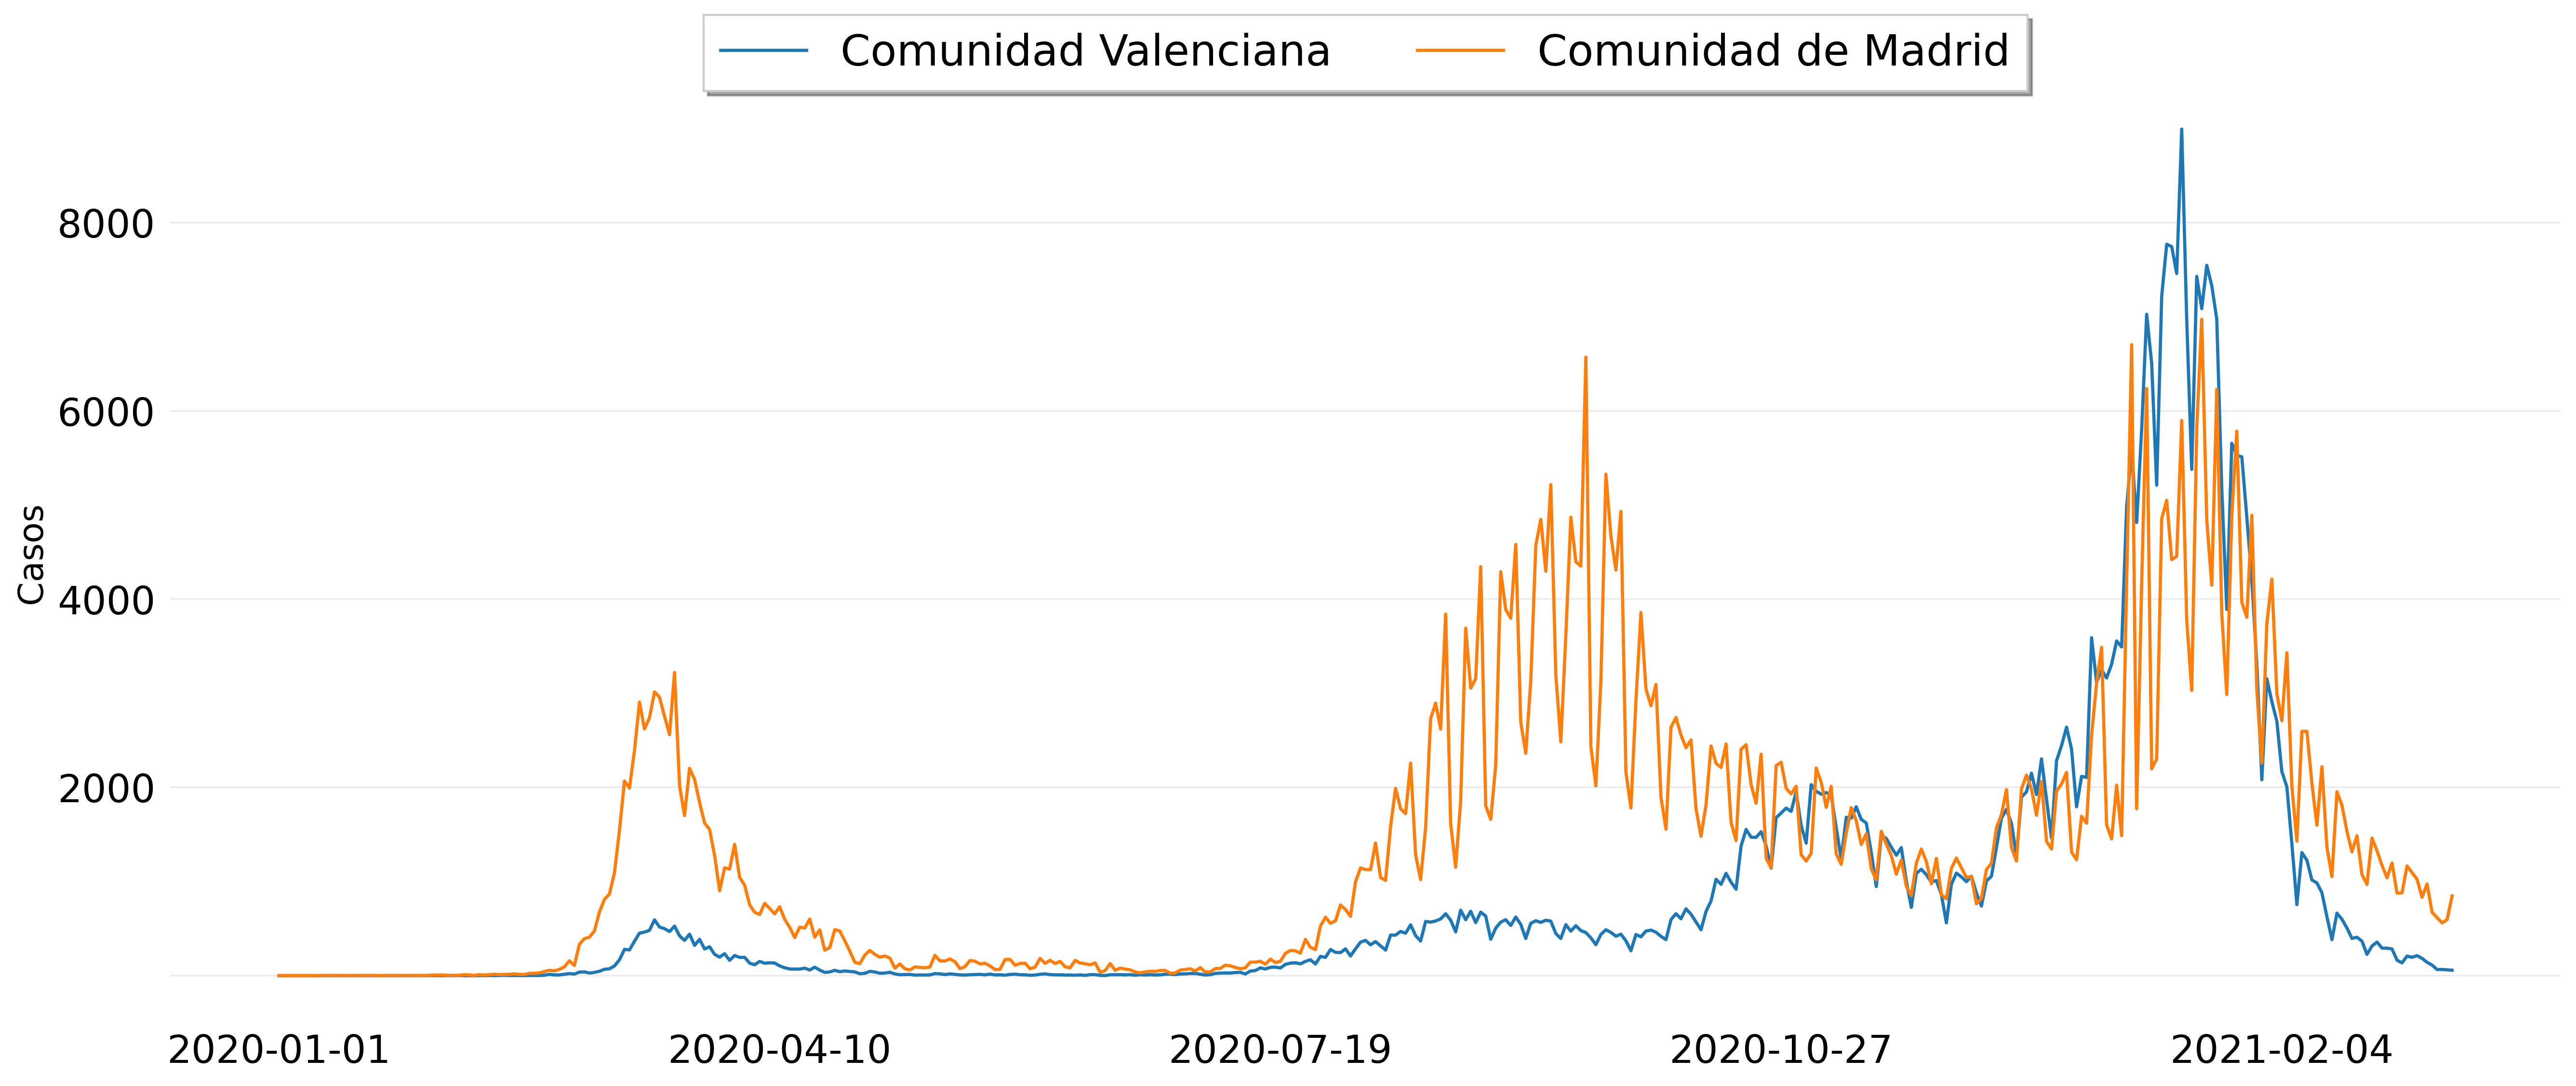

In [9]:
fig, ax = plt.subplots(figsize=(20,8)
                       , dpi = 320)

series = ['Comunidad Valenciana', 'Comunidad de Madrid']
for i in series:
    df[df.Comunidad == i][:-1]['Casos'].plot(label = i)

ax.set_ylabel('Casos', fontsize = 16)
nice_axes(ax)
plt.show()

In [10]:
df2 = (df
       .assign(Incidencia = lambda x: x.Casos / x.Total * 1e5)
       .pivot(columns='Comunidad', values = 'Incidencia')
       .rolling(14).sum()
      )[:-1]

df2.tail()

Comunidad    Andalucía      Aragón    Asturias    Canarias  Cantabria  \
fecha                                                                   
2021-03-06  122.654725  156.913955  184.631875  109.515283  96.928316   
2021-03-07  119.464898  152.475833  179.233282  108.044663  98.472307   
2021-03-08  115.010956  142.772142  166.767440  105.746818  90.923907   
2021-03-09  112.766263  136.002124  150.767974  101.380913  83.547062   
2021-03-10  103.433068  128.178993  139.872632   95.728215  75.312444   

Comunidad   Castilla y León  Castilla-La Mancha    Cataluña       Ceuta  \
fecha                                                                     
2021-03-06       123.469781           82.973918  217.570152  290.966960   
2021-03-07       121.465537           81.213717  214.112781  285.028859   
2021-03-08       113.365050           76.959898  203.406500  288.591720   
2021-03-09       106.308441           70.750300  192.815892  271.965036   
2021-03-10        99.418853           64.491808  178.150985  268.402176   

Comunidad   Comunidad Foral de Navarra  Comunidad Valenciana  \
fecha                                                          
2021-03-06                  124.319983             61.731898   
2021-03-07                  121.597648             58.548415   
2021-03-08                  118.724072             53.624890   
2021-03-09                  114.338087             47.791799   
2021-03-10                  104.053709             43.145100   

Comunidad   Comunidad de Madrid  Extremadura    Galicia  Islas Baleares  \
fecha                                                                     
2021-03-06           216.655496    41.353889  93.270497       51.214509   
2021-03-07           211.448921    44.079486  88.532948       49.251287   
2021-03-08           198.159616    43.421583  82.722048       45.410198   
2021-03-09           187.362977    42.575708  77.022184       42.422685   
2021-03-10           182.569388    39.474167  68.990558       39.435172   

Comunidad   La Rioja (España)     Melilla  País Vasco  Región de Murcia  
fecha                                                                    
2021-03-06          69.706234  377.830860  182.300955         75.632704  
2021-03-07          70.018818  369.791906  179.328657         75.301853  
2021-03-08          68.143314  368.643484  168.114987         71.728654  
2021-03-09          65.017473  357.159263  157.756978         65.707153  
2021-03-10          63.454553  349.120309  148.750014         61.339910

In [11]:
df2.loc[df2.index.max()].sort_values()

Comunidad
Islas Baleares                 39.435172
Extremadura                    39.474167
Comunidad Valenciana           43.145100
Región de Murcia               61.339910
La Rioja (España)              63.454553
Castilla-La Mancha             64.491808
Galicia                        68.990558
Cantabria                      75.312444
Canarias                       95.728215
Castilla y León                99.418853
Andalucía                     103.433068
Comunidad Foral de Navarra    104.053709
Aragón                        128.178993
Asturias                      139.872632
País Vasco                    148.750014
Cataluña                      178.150985
Comunidad de Madrid           182.569388
Ceuta                         268.402176
Melilla                       349.120309
Name: 2021-03-10, dtype: float64

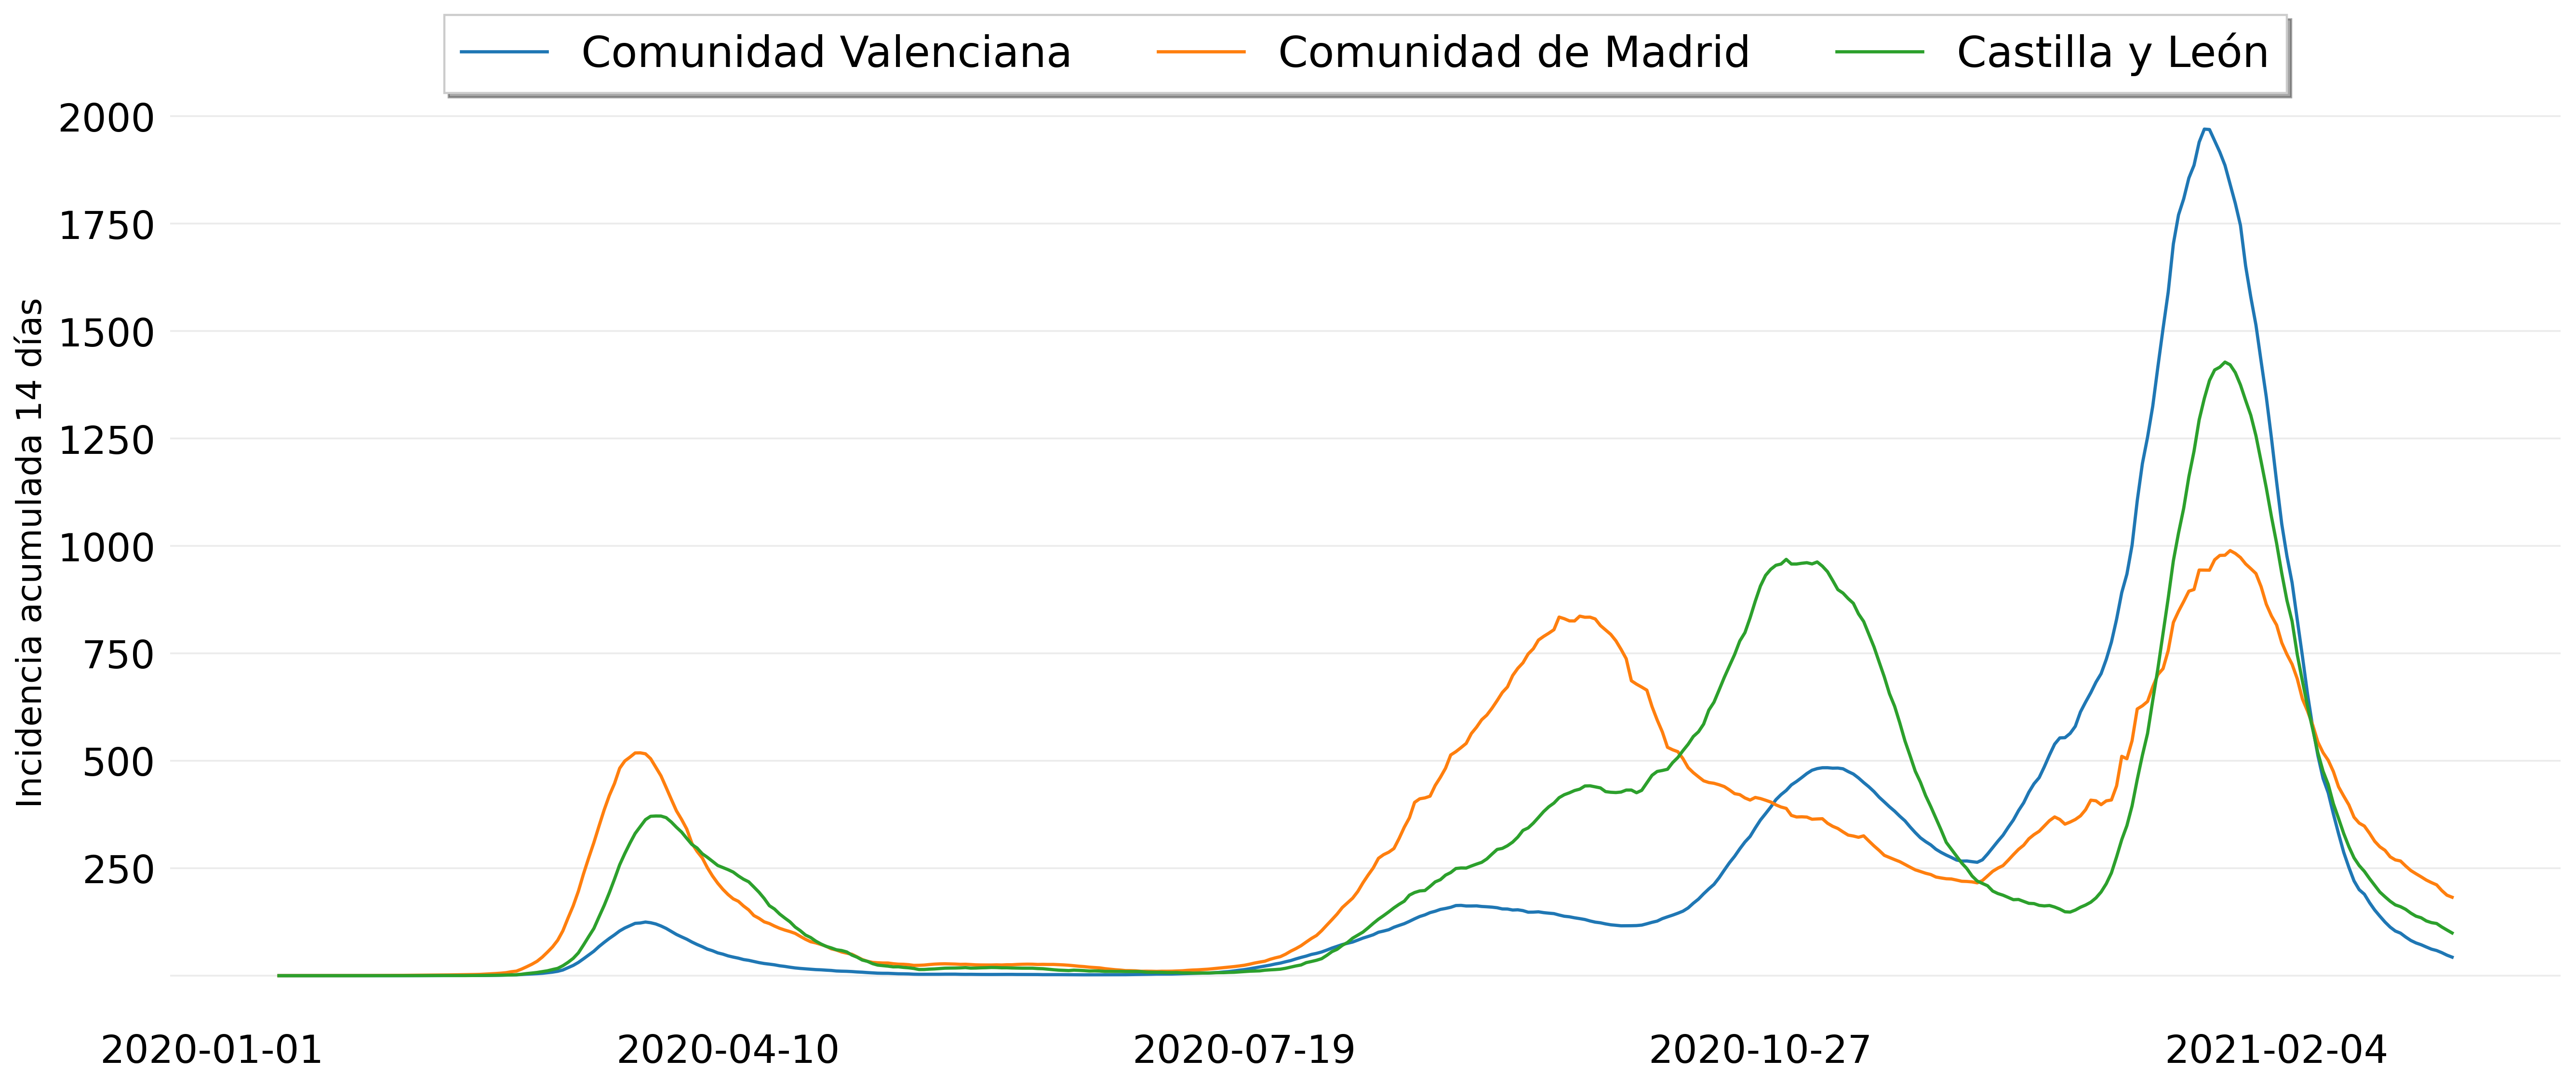

In [12]:
series.append('Castilla y León')

fig, ax = plt.subplots(figsize=(20,8)
                       , dpi = 320)

for i in series:
    df2[i].plot()

ax.set_ylabel('Incidencia acumulada 14 días', fontsize = 16)
nice_axes(ax)
plt.show()

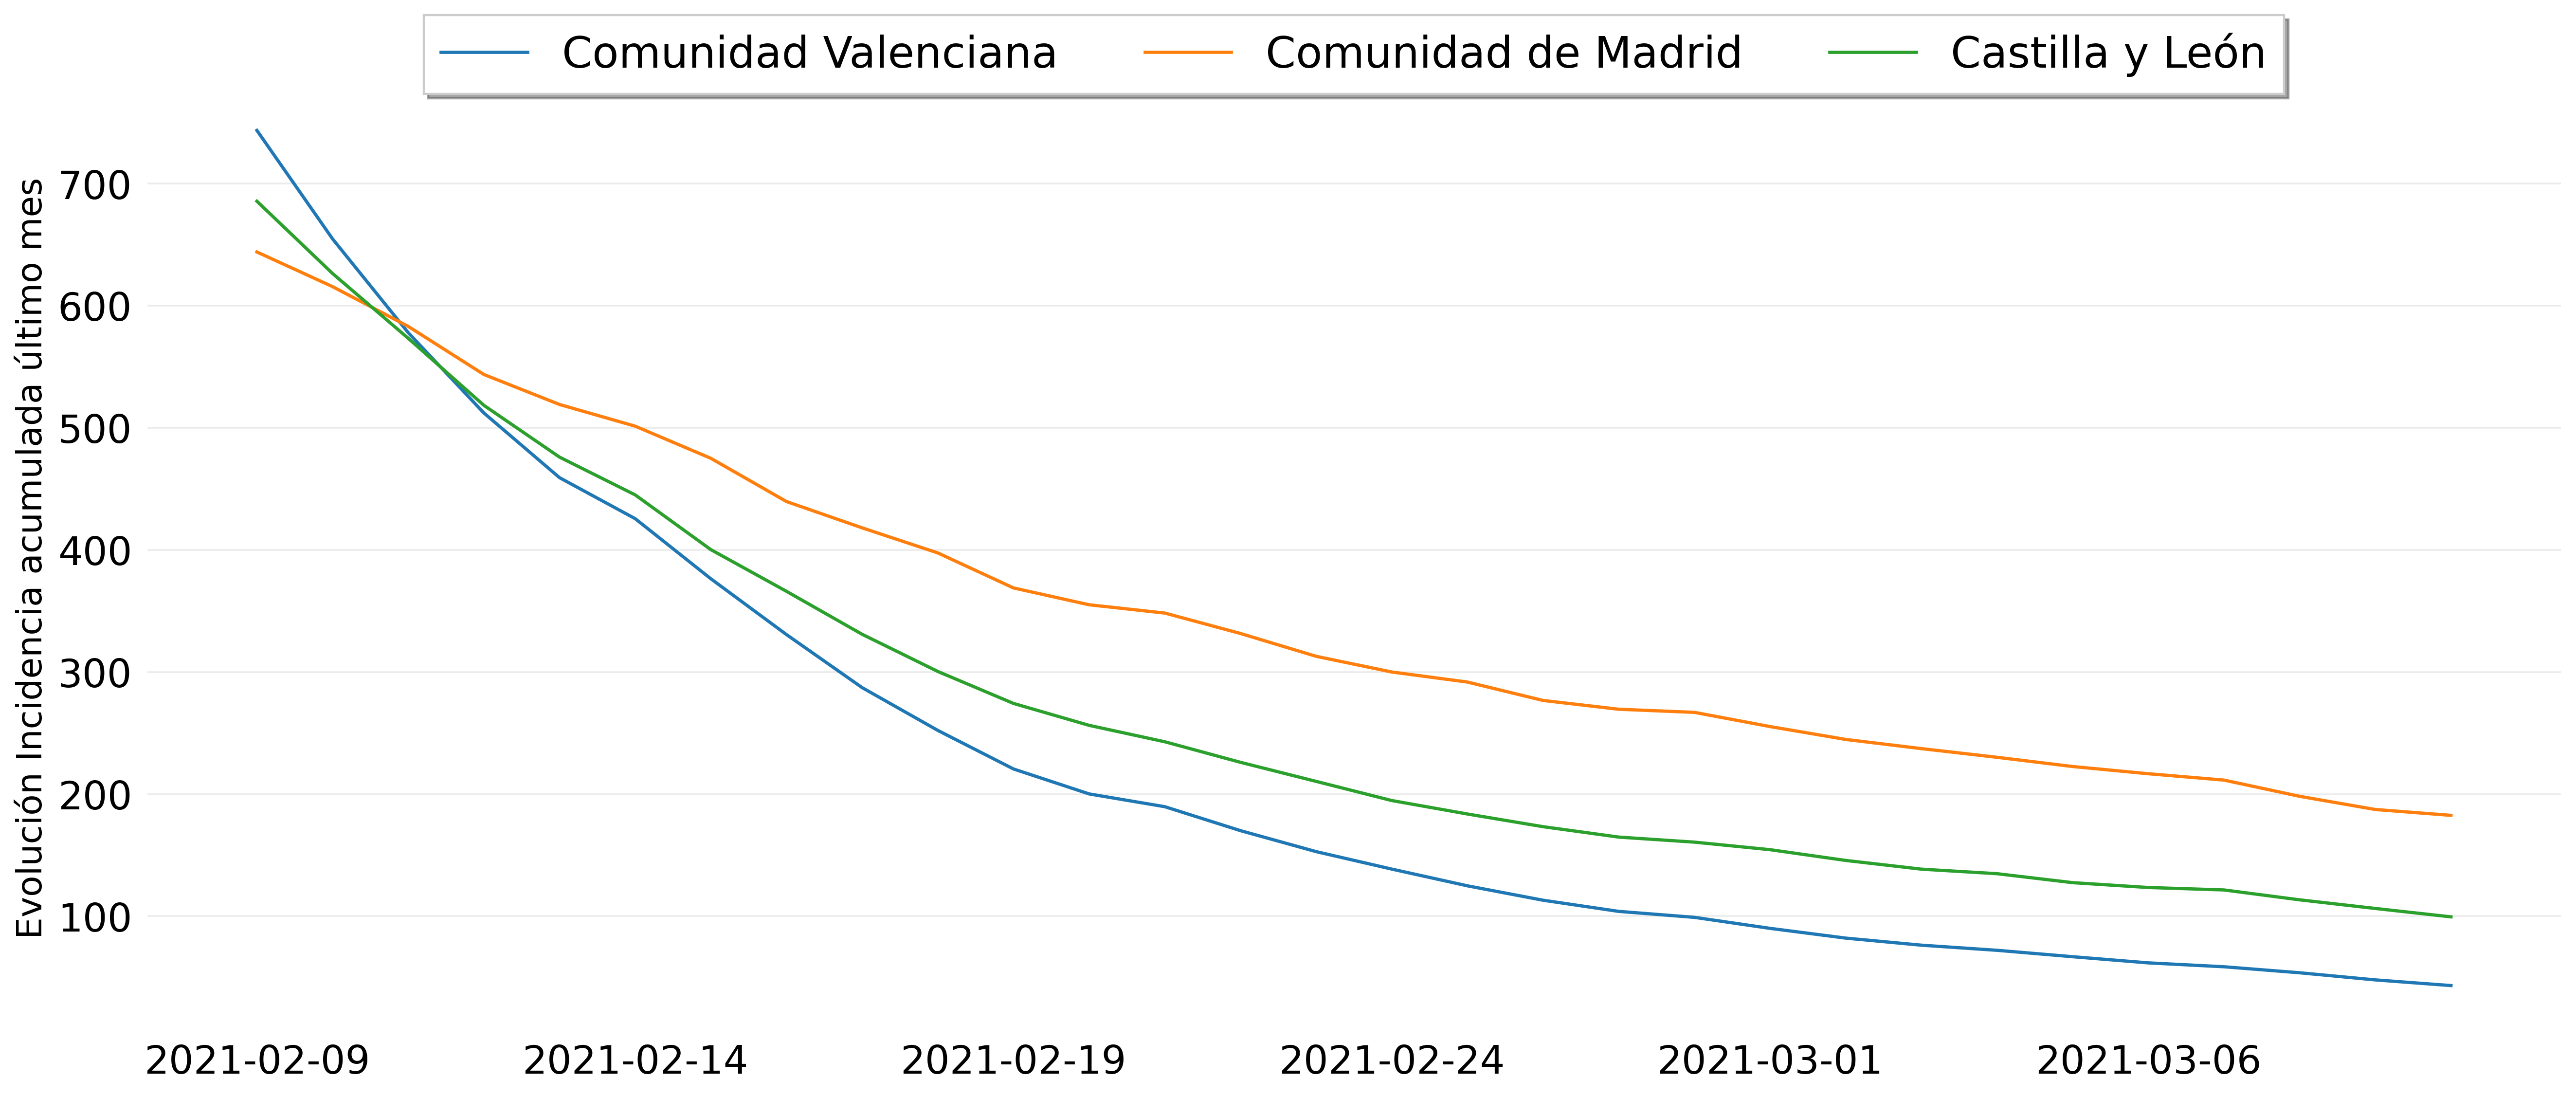

In [13]:
fig, ax = plt.subplots(figsize=(20,8)
                       , dpi = 320)

for i in series:
    df2[-30:][i].plot()

ax.set_ylabel('Evolución Incidencia acumulada último mes', fontsize = 16)
nice_axes(ax)